# Лабораторная работа №1
## Подготовка данных для построения моделей машинного обучения.
## Визуализация данных

# Регрессия
1.  Получить от преподавателя два датасета с тремя файлами (train.csv, test.csv, sample_submission.csv) для решения задач регрессии и классификации соответственно.
2.	Сделать первичную обработку данных файла train.csv (пропуски, выбросы, генерация новых признаков) для двух датасетов.
3.	Произвести визуализацию данных (распределение признаков, зависимость целевой переменной от других признаков, корреляционная матрица и т.д.) для двух датасетов и сделать выводы на основе полученных графиков.
4.	Сохранить обработанные датасеты в файл с расширением .csv для последующего построения моделей машинного обучения.

# Данные для регрессии

## Для задачи регрессии (цель - предсказание цены недвижимости):
-	Id - идентификационный номер квартиры
-	DistrictId - идентификационный номер района
-	Rooms - количество комнат
-	Square - площадь
-	LifeSquare - жилая площадь
-	KitchenSquare - площадь кухни
-	Floor - этаж
-	HouseFloor - количество этажей в доме
-	HouseYear - год постройки дома
-	Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
-	Social_1, Social_2, Social_3 - социальные показатели местности
-	Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
-	Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
-	Price - цена квартиры (целевая переменная)

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from scipy import stats
import numpy as np

In [147]:
import warnings

warnings.filterwarnings('ignore')

In [148]:
path = "data/reg/"
filename_test = "test.csv"
filename_train = "train.csv"

res_test_file = path + filename_test
res_train_file = path + filename_train

train_data = pd.read_csv(res_test_file)
# train_data = pd.read_csv(res_train_file)

## Предпросмотр данных

In [149]:
train_data.head() # Смотрим на первые 5 строчек, чтобы понять что у нас лежит в табличке

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  4567          44    1.0  36.847630   19.094182            5.0      5   
1  5925          62    1.0  42.493907   42.568133           10.0      7   
2   960          27    2.0  59.463678         NaN            9.0     19   
3  3848          23    3.0  49.646030   33.893825            6.0      2   
4   746          74    1.0  53.837056         NaN            1.0      8   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1970   0.036122         B         B        24      4378   
1        17.0       2017   0.072158         B         B         2       629   
2        19.0       1977   0.211401         B         B         9      1892   
3         2.0       1965   0.014073         B         B         2       475   
4        17.0       1977   0.309479         B         B        35      7715   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         0        1036.0            1        1       B  
1         1           NaN            0        0       A  
2         0           NaN            0        1       B  
3         0           NaN            0        0       B  
4         4         990.0            0        6       B

In [150]:
train_data.describe() # Первичный просмотр характеристик датасета

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  3959.000000   
mean    8412.595400    51.279200     1.910000    56.449500    36.158810   
std     4832.674037    44.179466     0.838594    19.092787    17.825287   
min        1.000000     0.000000     0.000000     1.378543     0.333490   
25%     4221.750000    21.000000     1.000000    41.906231    23.092026   
50%     8320.500000    37.000000     2.000000    52.921340    32.925087   
75%    12598.250000    77.000000     2.000000    66.285129    45.174091   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        5.976800     8.632000    12.601000  1984.392600     0.119874   
std         9.950018     5.483228     6.789213    18.573149     0.120070   
min         0.000000     1.000000     0.000000  1908.000000     0.000000   
25%         1.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    12.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max       620.000000    78.000000    99.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  5000.000000   5000.000000  5000.000000   2623.000000   5000.00000   
mean     24.933800   5406.900000     8.262600   1146.657263      1.31940   
std      17.532202   4026.614773    23.863762   1044.744231      1.47994   
min       0.000000    168.000000     0.000000      0.000000      0.00000   
25%       6.000000   1564.000000     0.000000    325.000000      0.00000   
50%      25.000000   5285.000000     2.000000    900.000000      1.00000   
75%      36.000000   7287.000000     5.000000   1548.000000      2.00000   
max      74.000000  19083.000000   141.000000   4849.000000      6.00000   

           Shops_1  
count  5000.000000  
mean      4.242800  
std       4.777365  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       6.000000  
max      23.000000

In [151]:
# Тут смотрю, по сколько этажей в домах и на каких этажах квартиры
print(train_data.Floor.value_counts())
print(train_data.HouseFloor.value_counts())

Floor
4     523
5     495
3     406
6     405
7     347
8     327
9     298
10    267
2     263
11    224
12    212
13    191
14    179
15    151
16    137
1     107
17    104
18     92
19     68
20     42
21     35
23     33
22     26
25     19
24     18
26     14
27      8
32      2
78      1
34      1
38      1
46      1
31      1
28      1
33      1
Name: count, dtype: int64
HouseFloor
17.0    1151
9.0      724
5.0      550
12.0     526
14.0     344
16.0     235
1.0      230
22.0     193
25.0     179
0.0      131
24.0      98
8.0       72
3.0       69
10.0      64
4.0       58
19.0      51
15.0      49
20.0      48
18.0      44
6.0       35
7.0       28
2.0       26
23.0      22
13.0      13
11.0      11
21.0       9
40.0       9
30.0       5
27.0       5
26.0       4
48.0       3
28.0       2
32.0       2
39.0       2
37.0       2
99.0       1
31.0       1
33.0       1
34.0       1
29.0       1
36.0       1
Name: count, dtype: int64


## Обработка пропусков

In [152]:
train_data.isnull().sum() # Смотрим наличие пропусков

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

Будем заполнять пропуски медианным значением, поскольку оно более устойчиво к выбросам,
чем среднее арифметическое и позволяет сохранить данные, в отличие от простого удаления строк

In [153]:
med = train_data.LifeSquare.median()
train_data.LifeSquare = train_data.LifeSquare.fillna(med)

In [154]:
med = train_data.Healthcare_1.median()
train_data.Healthcare_1 = train_data.Healthcare_1.fillna(med)

In [155]:
train_data.isnull().sum() # Смотрим наличие пропусков

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

## Обработка выбросов

- Для каждого столбца построим Box и гистограмму для наглядного определения выбросов.
- При обнаружении выбросов заменим их на медианное значение в случае работы с количественным признаком.
- Для каждого столбца построим Box и гистограмму для наглядной проверки правильности удаления выбросов.

In [156]:
def show_graph(column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(train_data[column], ax=axes[0])
    sns.kdeplot(train_data[column], ax=axes[1], fill=True)
    sns.boxplot(train_data[column], ax=axes[2])

def remove_outliers(column):
    show_graph(column)
    median = train_data[column].median()
    q25 = train_data[column].quantile(0.25)
    q75 = train_data[column].quantile(0.75)
    iq = q75 - q25

    min_border = q25 - 1.5 * iq
    max_border = q75 + 1.5 * iq

    mask1 = train_data[column] < min_border
    mask2 = train_data[column] > max_border

    train_data.loc[mask1, column] = min_border
    train_data.loc[mask2, column] = max_border

    show_graph(column)


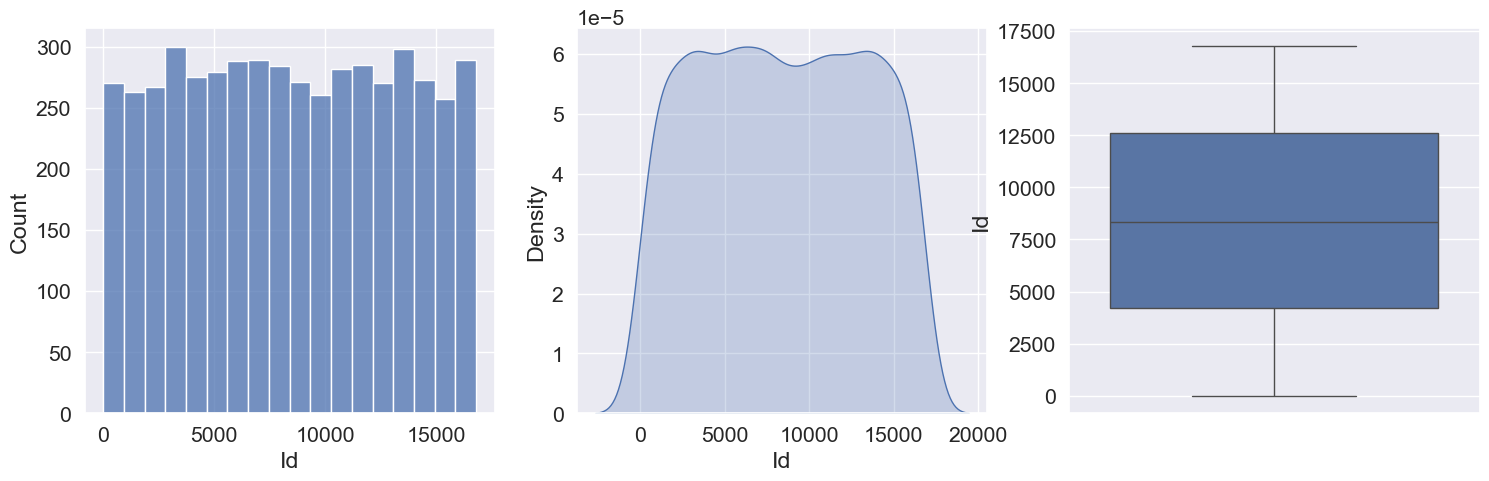

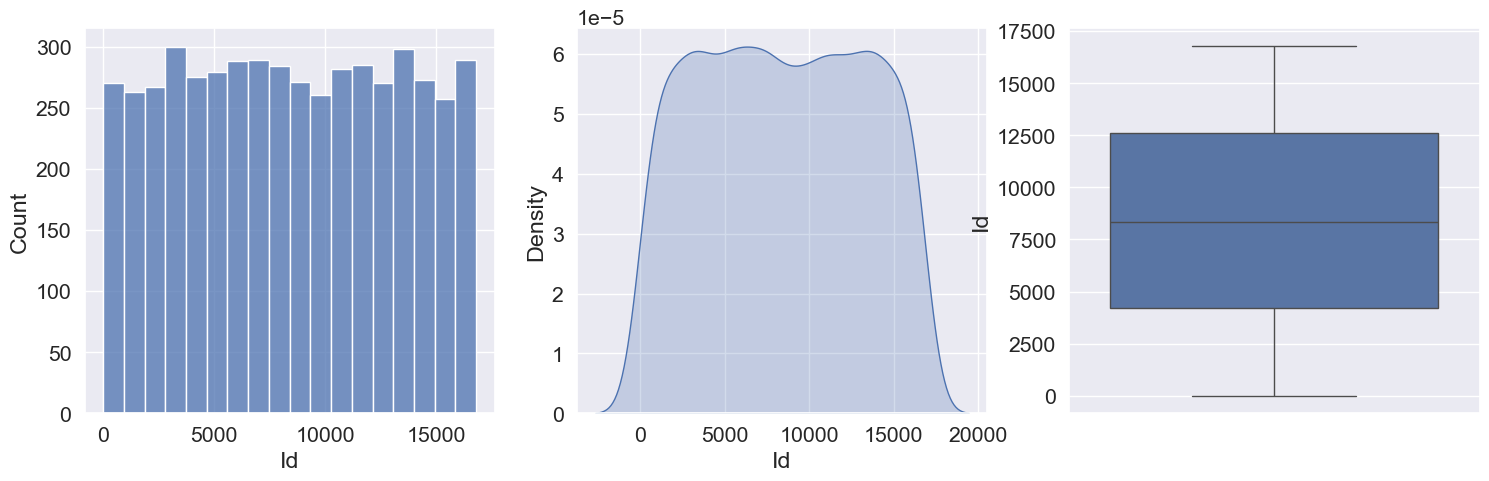

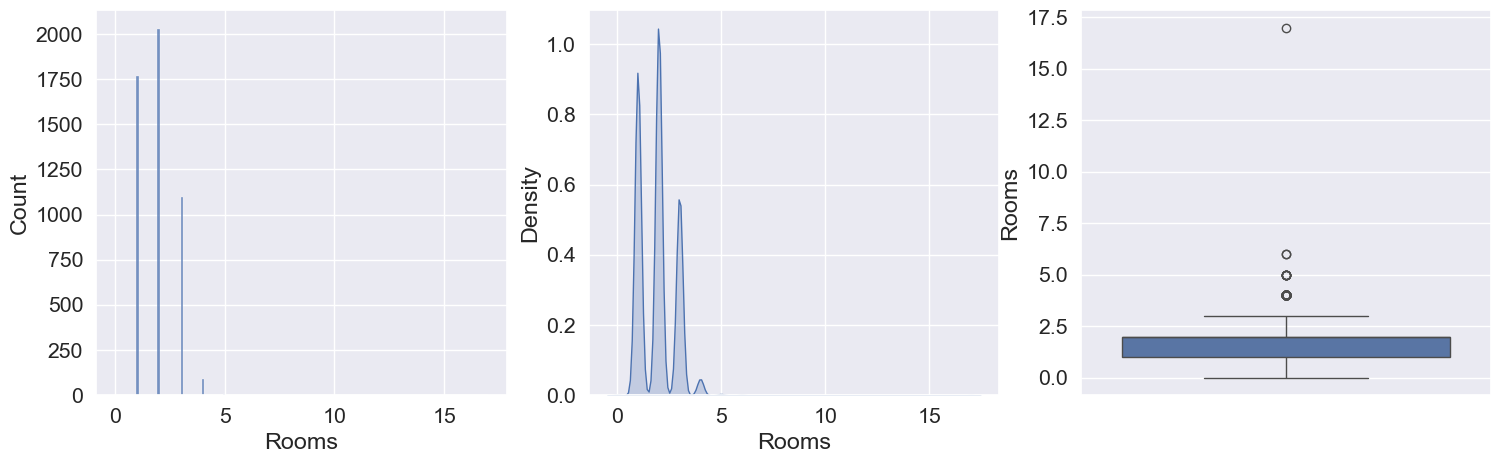

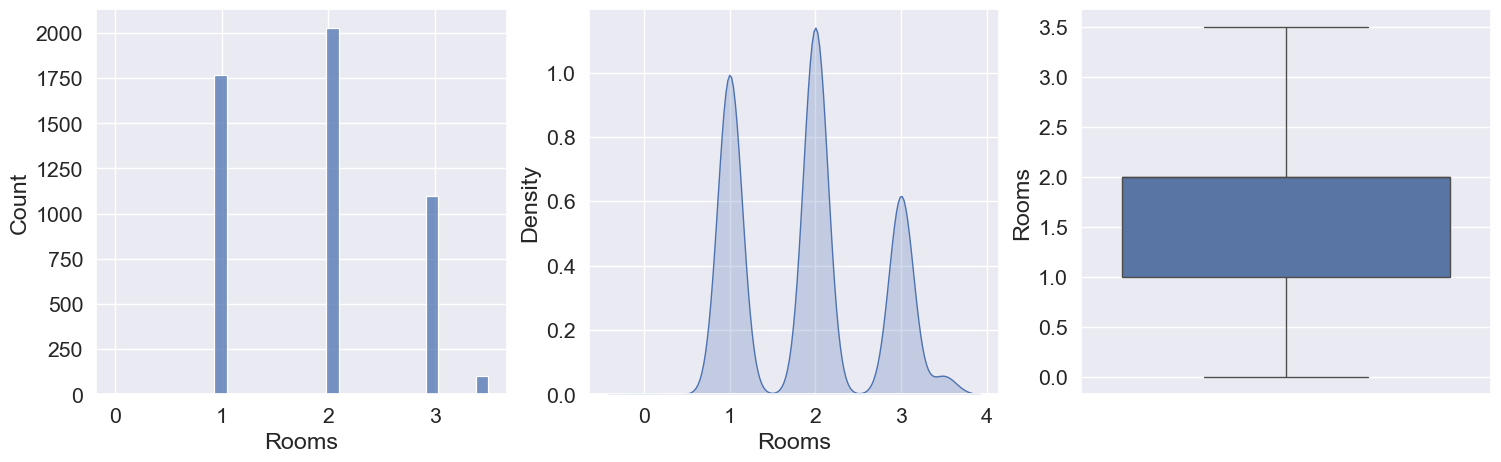

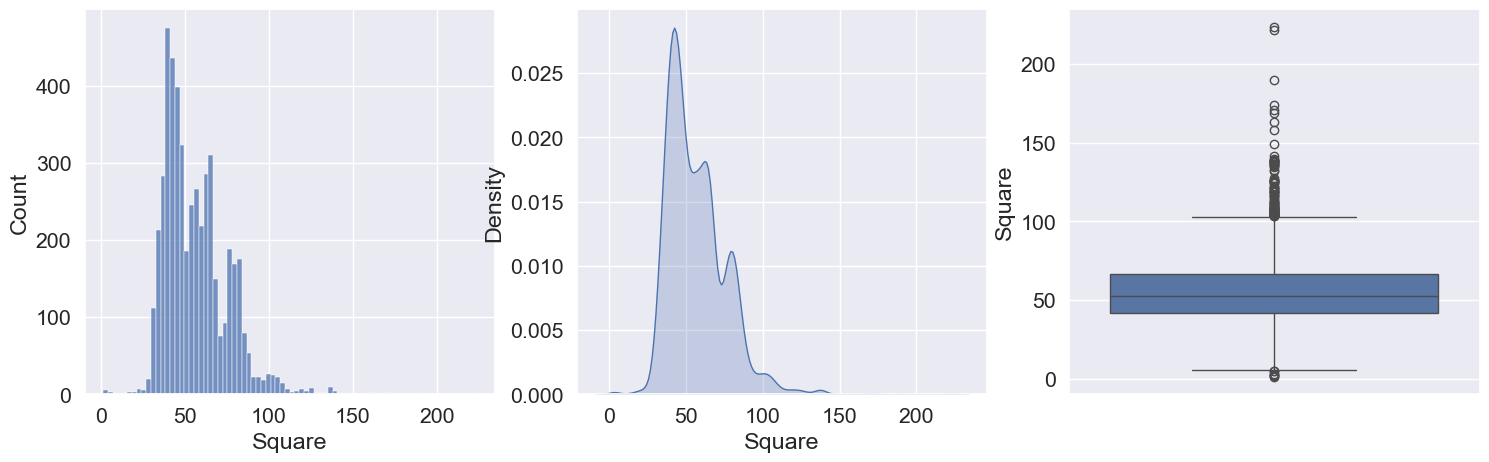

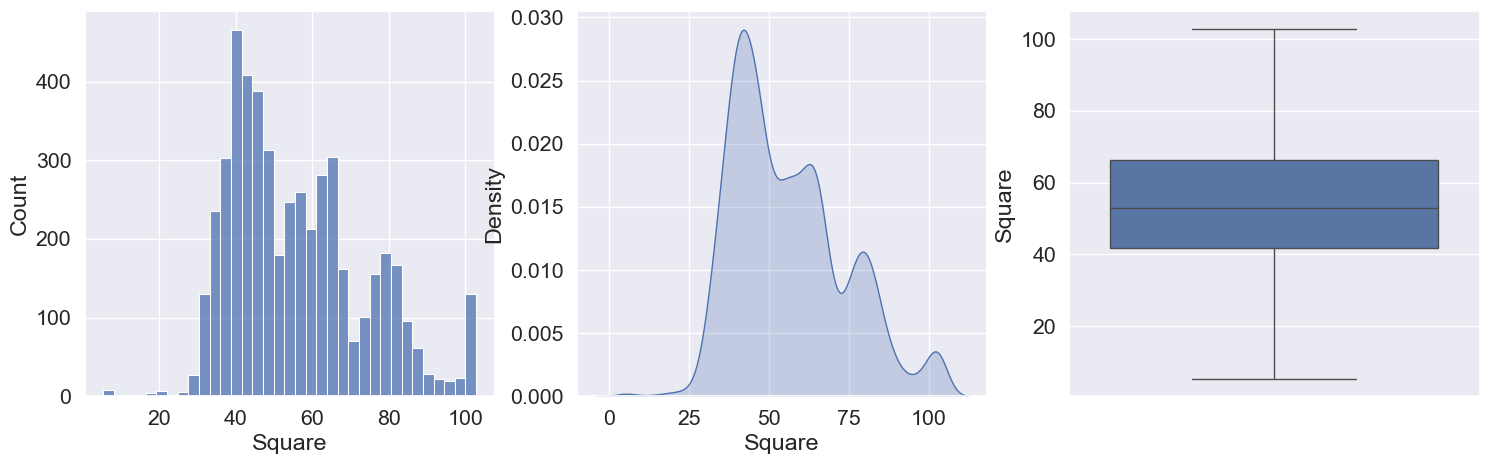

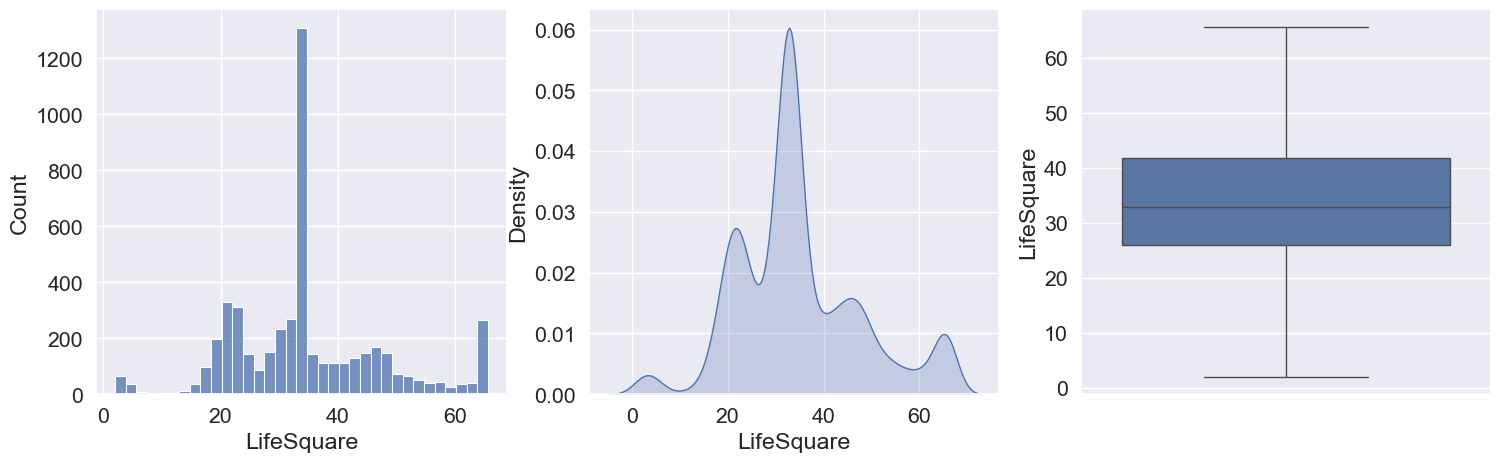

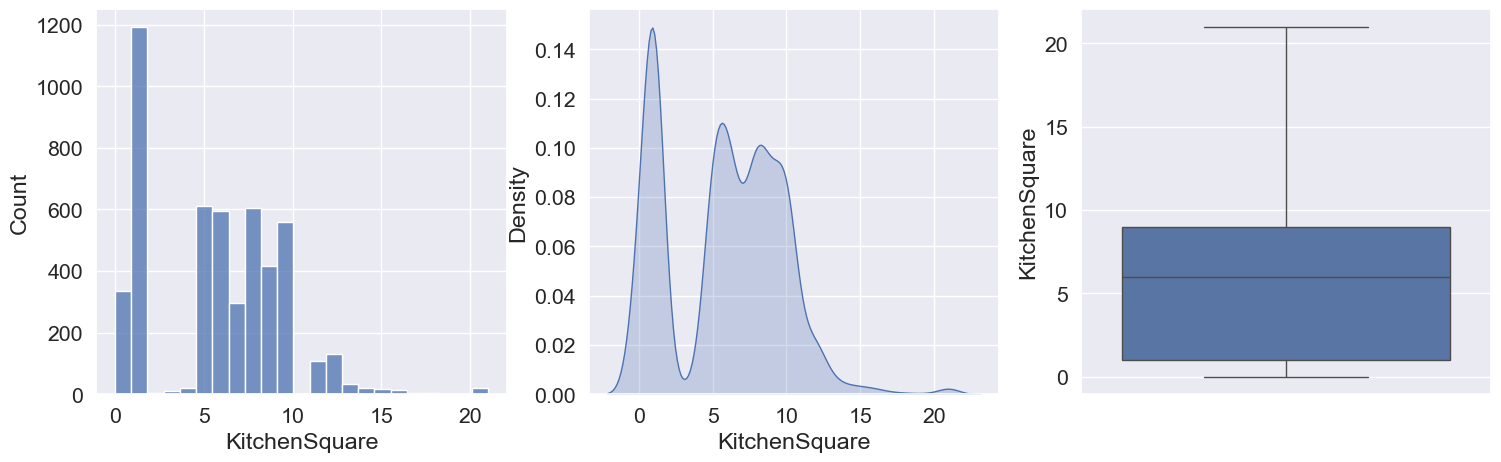

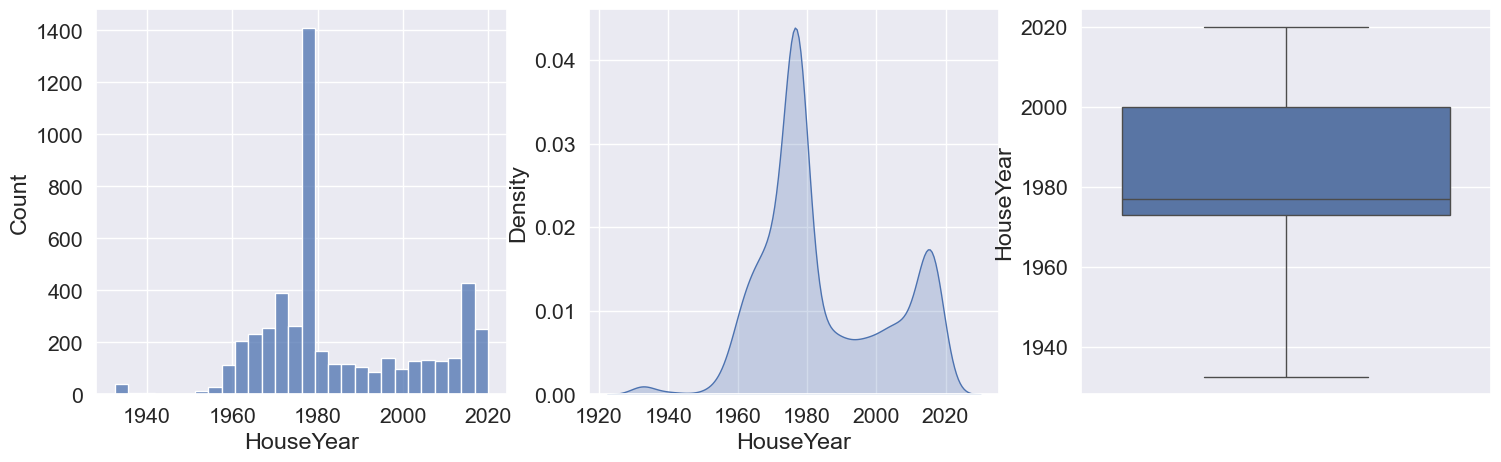

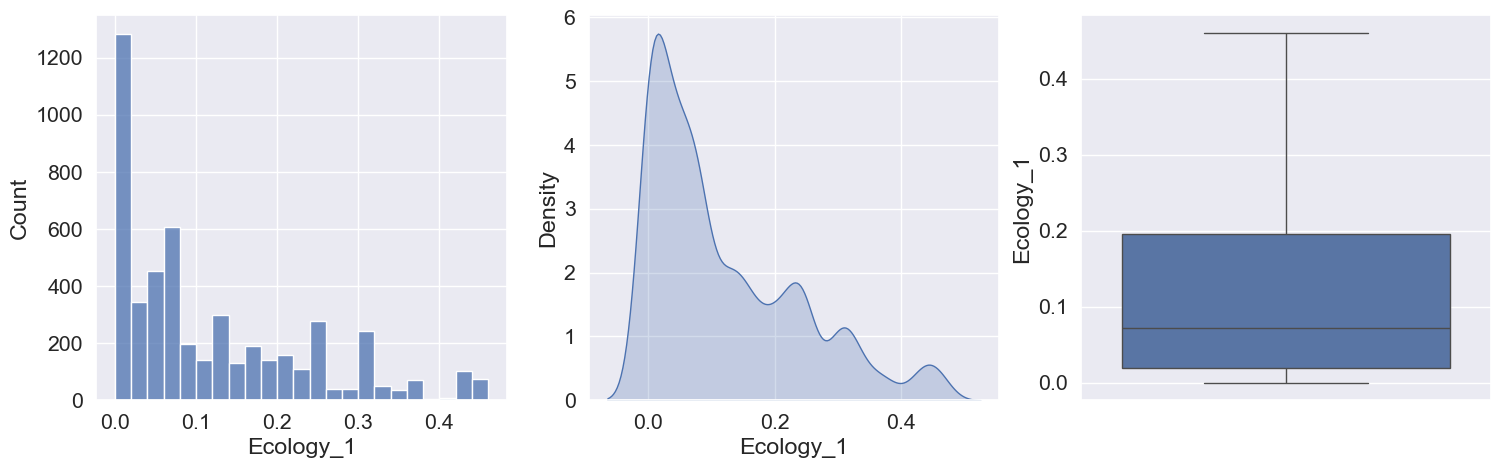

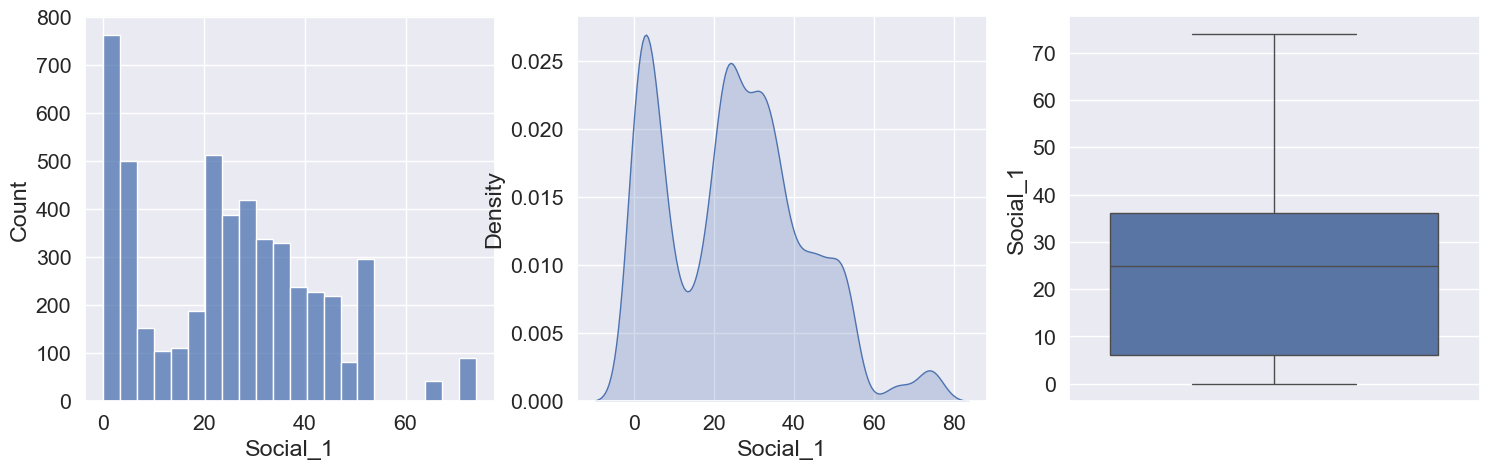

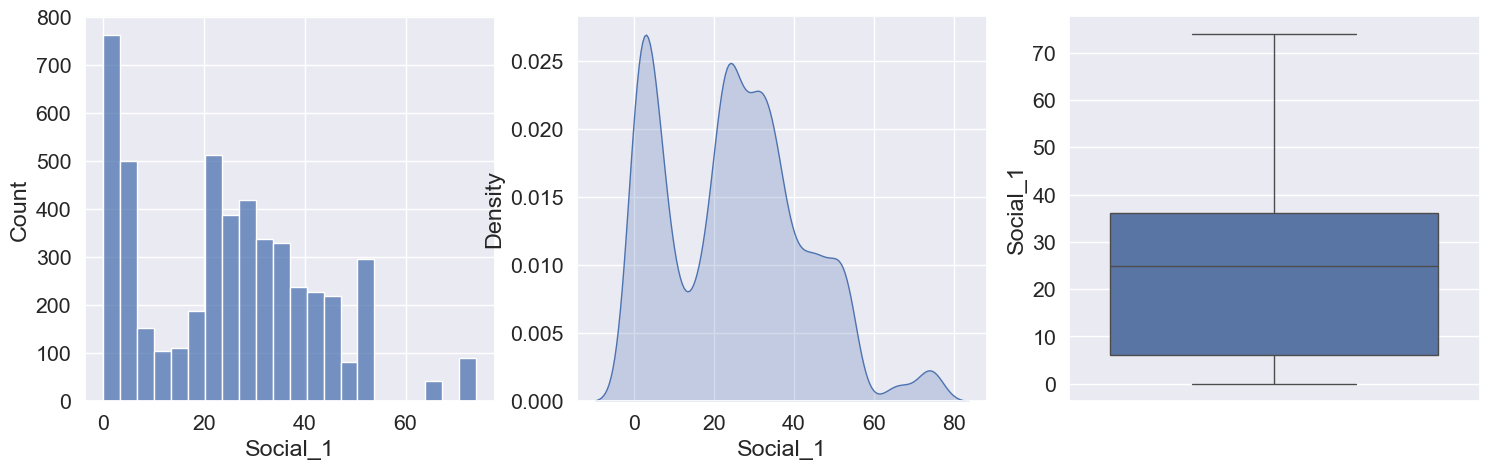

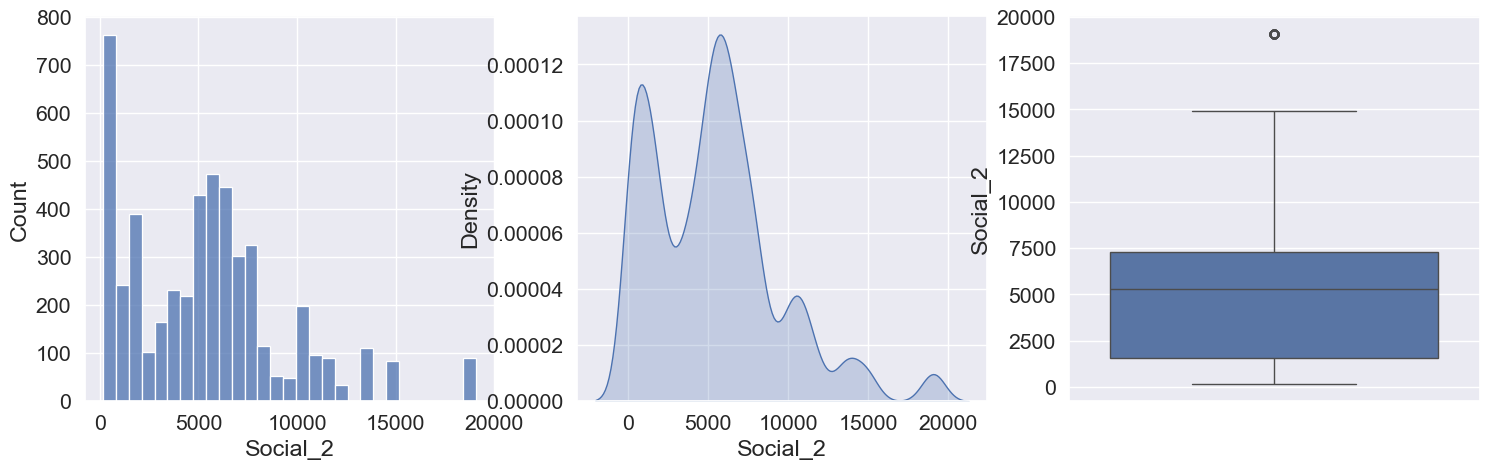

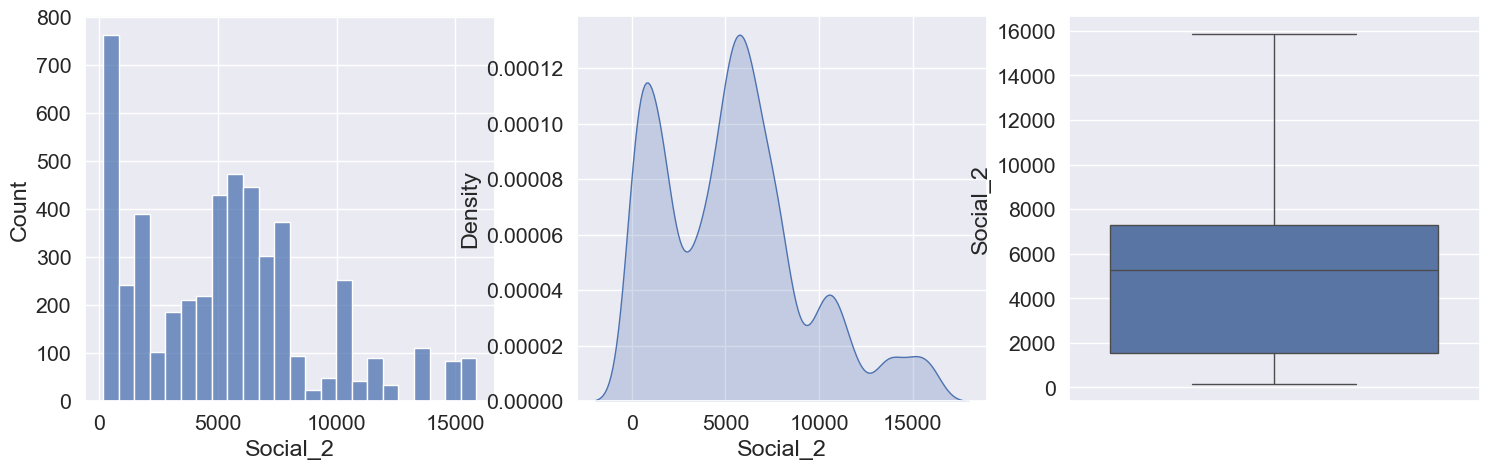

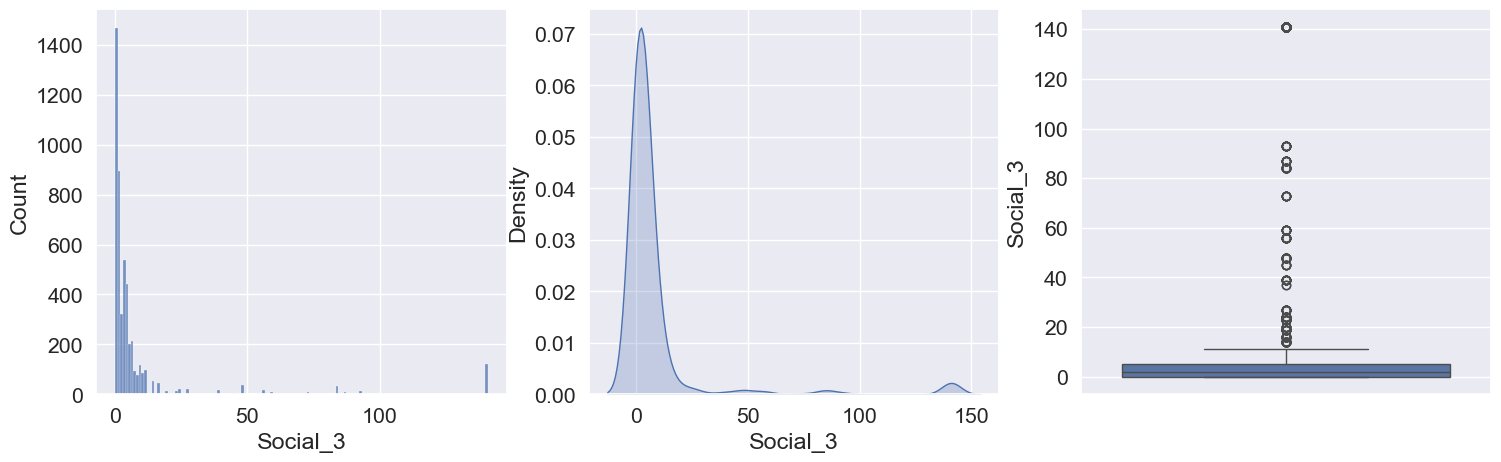

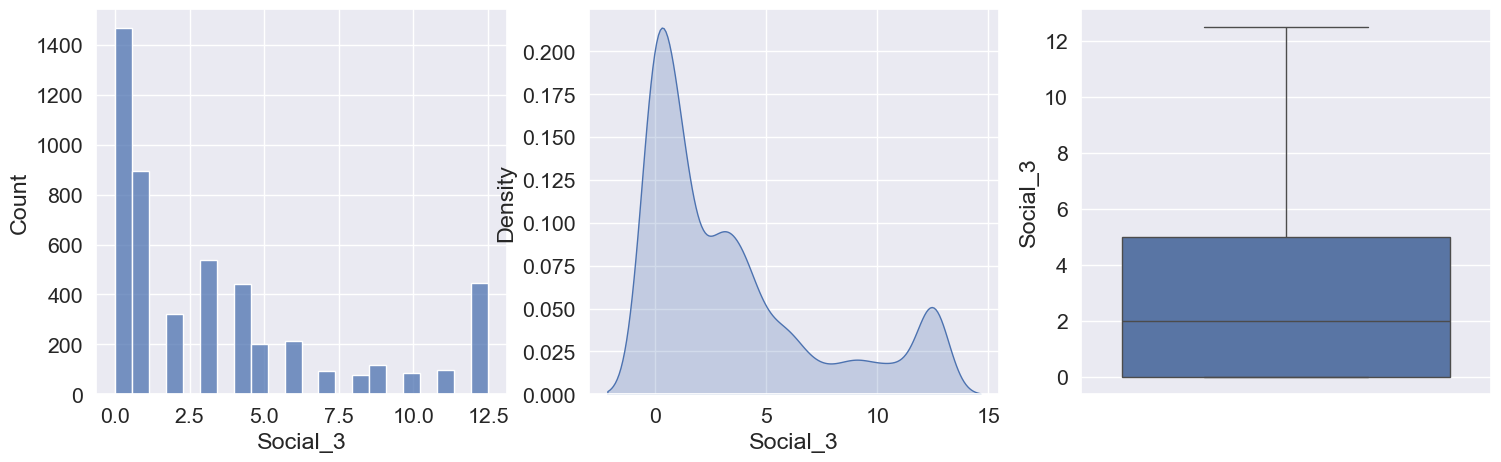

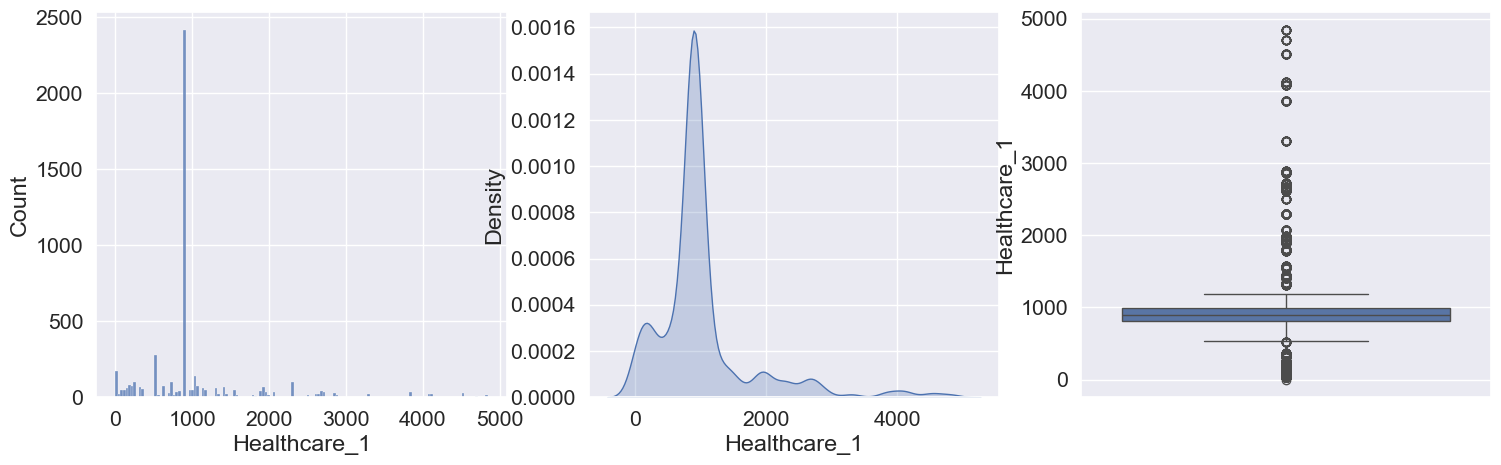

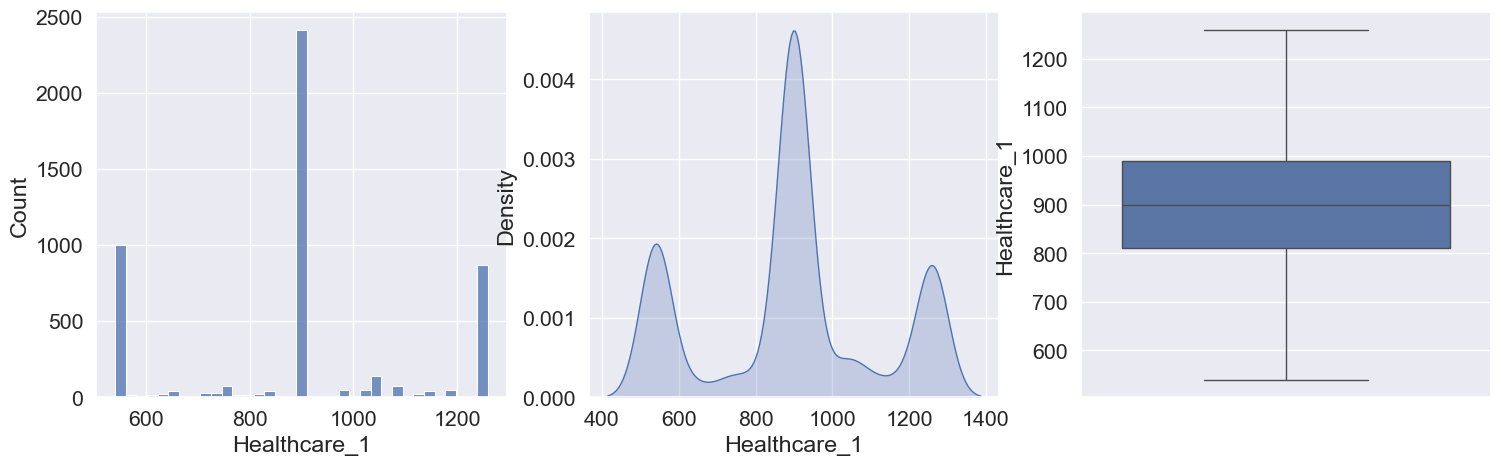

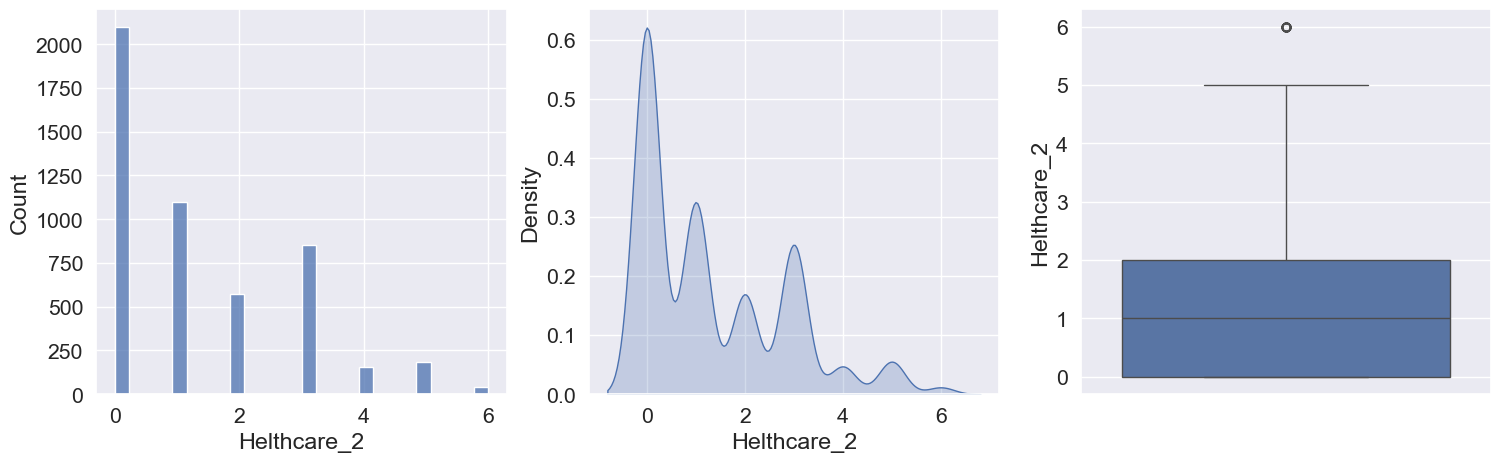

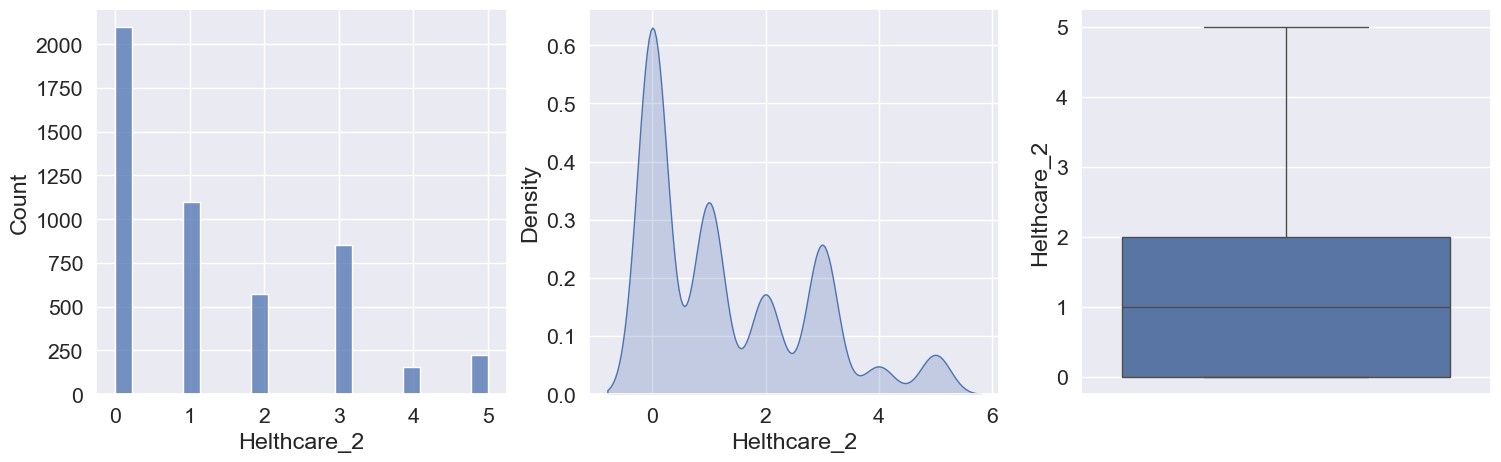

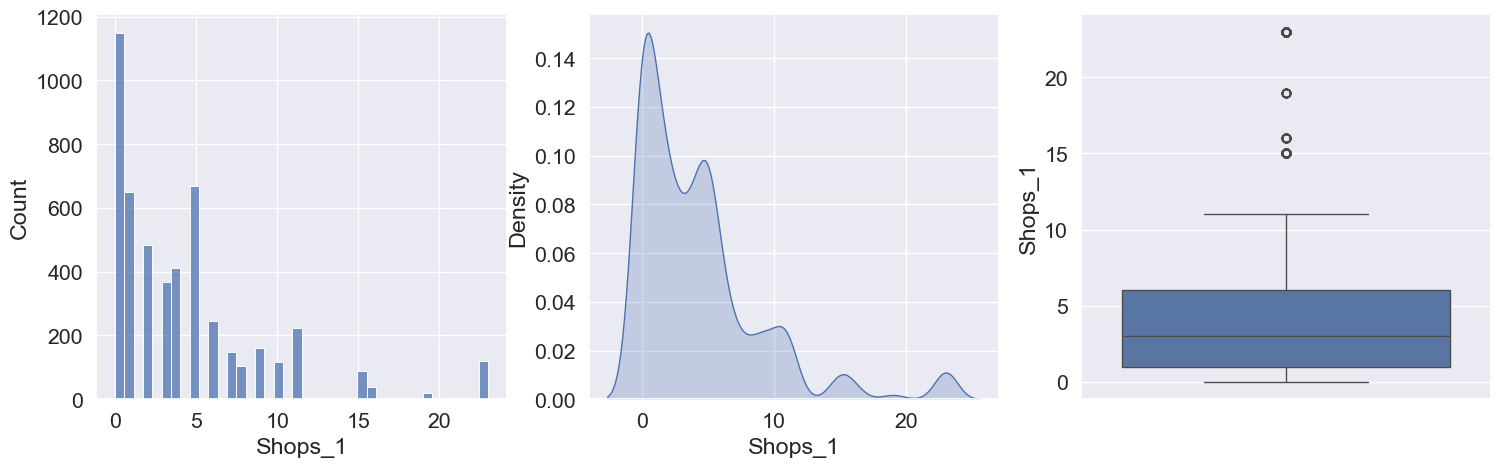

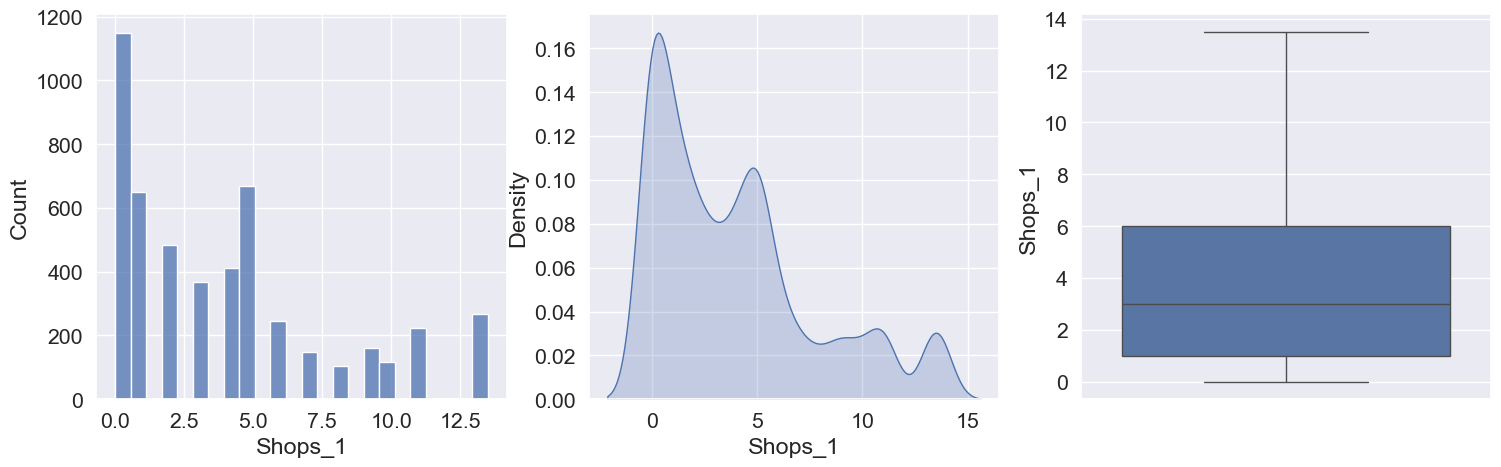

In [157]:
for column in train_data.columns:
    if train_data[column].dtype == np.dtypes.ObjectDType:
        continue
    if column == 'Floor' or column == 'HouseFloor':
        continue
    remove_outliers(column)


Преобразовываем категориальные признаки через One Hot Encoding

In [158]:
train_data = pd.get_dummies(train_data, dtype=int)
train_data.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  4567          44    1.0  36.847630   19.094182            5.0      5   
1  5925          62    1.0  42.493907   42.568133           10.0      7   
2   960          27    2.0  59.463678   32.925087            9.0     19   
3  3848          23    3.0  49.646030   33.893825            6.0      2   
4   746          74    1.0  53.837056   32.925087            1.0      8   

   HouseFloor  HouseYear  Ecology_1  ...  Social_3  Healthcare_1  Helthcare_2  \
0         9.0     1970.0   0.036122  ...       0.0        1036.0            1   
1        17.0     2017.0   0.072158  ...       1.0         900.0            0   
2        19.0     1977.0   0.211401  ...       0.0         900.0            0   
3         2.0     1965.0   0.014073  ...       0.0         900.0            0   
4        17.0     1977.0   0.309479  ...       4.0         990.0            0   

   Shops_1  Ecology_2_A  Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_2_A  \
0      1.0            0            1            0            1          0   
1      0.0            0            1            0            1          1   
2      1.0            0            1            0            1          0   
3      0.0            0            1            0            1          0   
4      6.0            0            1            0            1          0   

   Shops_2_B  
0          1  
1          0  
2          1  
3          1  
4          1  

[5 rows x 22 columns]

Строим корреляционную матрицу для нашего набора данных

На данном этапе я не понял что конкретно делать с сильно коррелированными признаками, знаю, что это плохо,

потому что по сути в модель подаются 2 одинаковых набора значений с отличием в коэффициент, надо либо как-то убирать лишний,

либо создавать новый признак.

В общем данный вопрос еще в разработке.

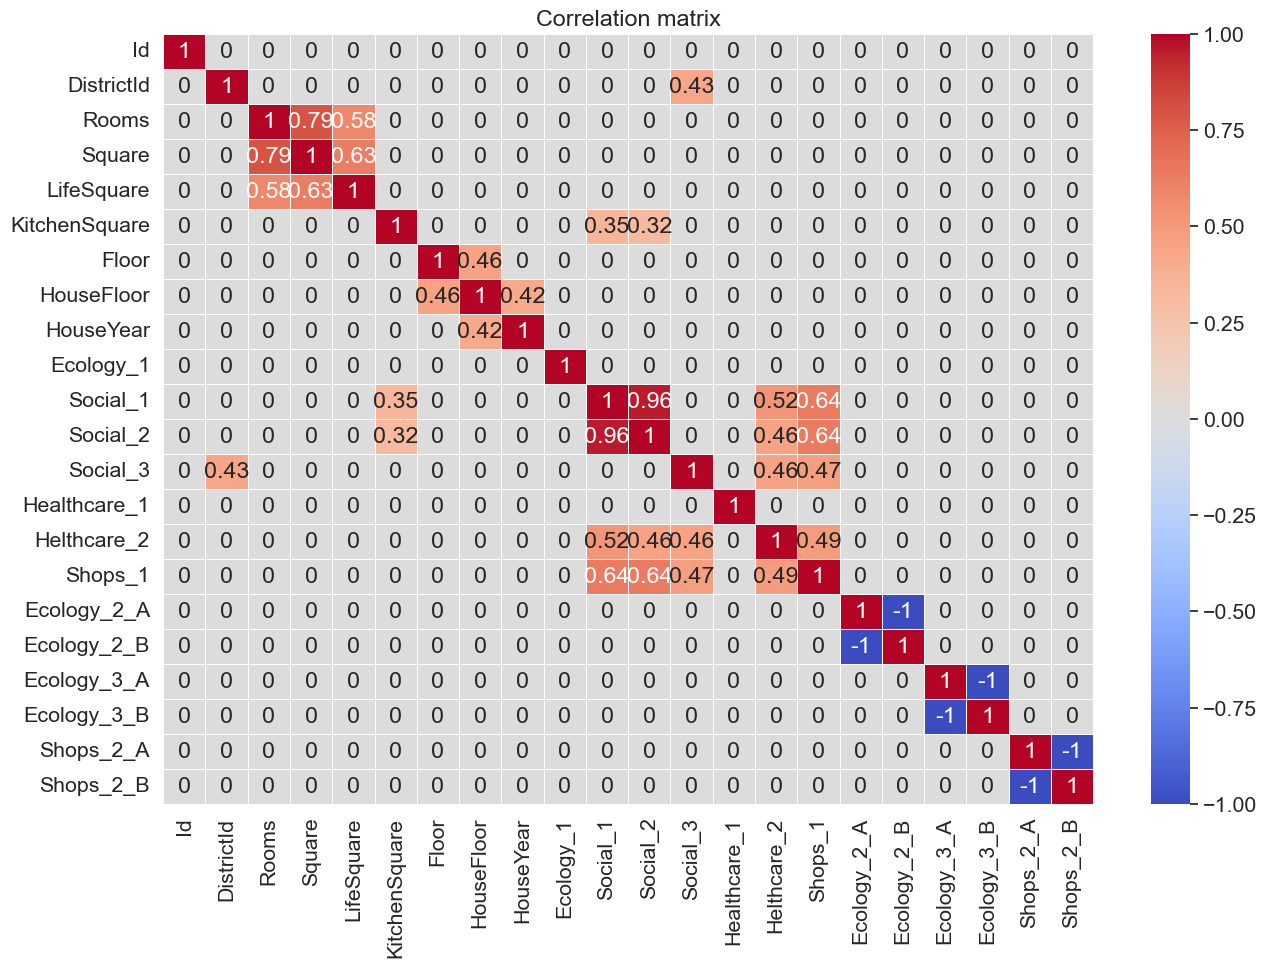

In [159]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_data.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, square=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [160]:
train_data.drop("Ecology_2_B", axis=1, inplace=True)
train_data.drop("Ecology_3_B", axis=1, inplace=True)
train_data.drop("Shops_2_B", axis=1, inplace=True)
train_data.drop("Rooms", axis=1, inplace=True)

In [161]:
train_data.head()

Id  DistrictId     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0  4567          44  36.847630   19.094182            5.0      5         9.0   
1  5925          62  42.493907   42.568133           10.0      7        17.0   
2   960          27  59.463678   32.925087            9.0     19        19.0   
3  3848          23  49.646030   33.893825            6.0      2         2.0   
4   746          74  53.837056   32.925087            1.0      8        17.0   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0     1970.0   0.036122        24    4378.0       0.0        1036.0   
1     2017.0   0.072158         2     629.0       1.0         900.0   
2     1977.0   0.211401         9    1892.0       0.0         900.0   
3     1965.0   0.014073         2     475.0       0.0         900.0   
4     1977.0   0.309479        35    7715.0       4.0         990.0   

   Helthcare_2  Shops_1  Ecology_2_A  Ecology_3_A  Shops_2_A  
0            1      1.0            0            0          0  
1            0      0.0            0            0          1  
2            0      1.0            0            0          0  
3            0      0.0            0            0          0  
4            0      6.0            0            0          0

Нормирую данные и вывожу сохраняю в файл.

In [162]:
# from sklearn.preprocessing import StandardScaler
#
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(train_data[train_data.columns[:-7]])
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_data.columns[:-7])
#
# answer = pd.concat([X_train_scaled, train_data[train_data.columns[16:]]], axis=1)


In [163]:
# answer

In [164]:
train_data.to_csv(path + "prepared_test.csv", index=False)

# Для задачи классификации (цель – предсказать факт невыполнения кредитных обязательств)

- Home Ownership - домовладение
- Annual Income - годовой доход
- Years in current job - количество лет на текущем месте работы
- Tax Liens - налоговые обременения
- Number of Open Accounts - количество открытых счетов
- Years of Credit History - количество лет кредитной истории
- Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)
- Number of Credit Problems - количество проблем с кредитом
- Months since last delinquent - количество месяцев с последней просрочки платежа
- Bankruptcies - банкротства
- Purpose - цель кредита
- Term - срок кредита
- Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)
- Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)
- Monthly Debt - ежемесячный долг
- Credit Score - баллы кредитного рейтинга
- Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from scipy import stats
import numpy as np

In [19]:
path = "data/clas/"
filename_test = "test.csv"
filename_train = "train.csv"

res_test_file = path + filename_test
res_train_file = path + filename_train

test_data = pd.read_csv(res_test_file)
train_data = pd.read_csv(res_train_file)

Для задачи классификации данные обрабатывал аналогичным образом со всеми теми же проблемами, которые были и в регрессии.

Единственное, что тут уже встречались пропуски в категориальных признаках. Их заменял не медианой, а модой.

## Предпросмотр данных

In [20]:
train_data.head() # Смотрим на первые 5 строчек, чтобы понять что у нас лежит в табличке

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [21]:
train_data.describe() # Первичный просмотр характеристик датасета

Annual Income    Tax Liens  Number of Open Accounts  \
count   5.943000e+03  7500.000000              7500.000000   
mean    1.366392e+06     0.030133                11.130933   
std     8.453392e+05     0.271604                 4.908924   
min     1.645970e+05     0.000000                 2.000000   
25%     8.443410e+05     0.000000                 8.000000   
50%     1.168386e+06     0.000000                10.000000   
75%     1.640137e+06     0.000000                14.000000   
max     1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              7500.000000         7.500000e+03   
mean                 18.317467         9.451537e+05   
std                   7.041946         1.602622e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.792295e+05   
50%                  17.000000         4.781590e+05   
75%                  21.800000         7.935015e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   3419.000000   7486.000000   
mean                    0.170000                     34.692600      0.117152   
std                     0.498598                     21.688806      0.347192   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         7.500000e+03            7.500000e+03    7500.000000   
mean          1.187318e+07            2.898332e+05   18314.454133   
std           3.192612e+07            3.178714e+05   11926.764673   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.801690e+05            1.142565e+05   10067.500000   
50%           3.095730e+05            2.093230e+05   16076.500000   
75%           5.198820e+05            3.604062e+05   23818.000000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5943.000000     7500.000000  
mean    1151.087498        0.281733  
std     1604.451418        0.449874  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000

In [22]:
train_data.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [23]:
for col in train_data.columns:
    print(f"-{col}")
    print(train_data[col].dtypes)
    un = train_data[col].unique()
    print(len(un))
    if len(un) < 100:
        print(un)

-Home Ownership
object
4
['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']
-Annual Income
float64
5479
-Years in current job
object
12
[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
-Tax Liens
float64
8
[0. 3. 1. 2. 4. 6. 5. 7.]
-Number of Open Accounts
float64
39
[11. 15.  8. 13. 12.  9. 17. 10.  7.  6. 14.  3. 20. 19. 22. 18.  5. 16.
  4.  2. 23. 24. 21. 25. 32. 33. 31. 30. 29. 28. 26. 27. 43. 41. 34. 38.
 35. 37. 42.]
-Years of Credit History
float64
408
-Maximum Open Credit
float64
6963
-Number of Credit Problems
float64
8
[1. 0. 3. 2. 6. 4. 5. 7.]
-Months since last delinquent
float64
90
[ nan  73.  18.   6.  40.  44.  45.  17.  61.  14.  11.  32.  75.  65.
  10.  28.  35.  29.  13.   8.  71.  54.  21.  68.  51.  70.  19.  22.
  16.  38.  36.   0.  34.  30.   3.  52.  72.  63.  23.   5.  60.  59.
   1.  74.   4.  42.  39.  41.  55.  67.  37.  47.  26.  76.  43.  12.
   7.  77.  48.  79.  80.  31.  64.  78.  

In [24]:
med = train_data['Annual Income'].median()
train_data['Annual Income'] = train_data['Annual Income'].fillna(med)

In [25]:
mode = train_data['Years in current job'].mode()[0]
train_data['Years in current job'] = train_data['Years in current job'].fillna(mode)

In [26]:
med = train_data['Months since last delinquent'].median()
train_data['Months since last delinquent'] = train_data['Months since last delinquent'].fillna(med)

In [27]:
med = train_data['Bankruptcies'].median()
train_data['Bankruptcies'] = train_data['Bankruptcies'].fillna(med)

In [28]:
med = train_data['Credit Score'].median()
train_data['Credit Score'] = train_data['Credit Score'].fillna(med)

In [29]:
def show_graph(column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(train_data[column], ax=axes[0])
    sns.kdeplot(train_data[column], ax=axes[1], fill=True)
    sns.boxplot(train_data[column], ax=axes[2])

def remove_outliers(column):
    show_graph(column)
    median = train_data[column].median()
    q25 = train_data[column].quantile(0.25)
    q75 = train_data[column].quantile(0.75)
    iq = q75 - q25

    min_border = q25 - 1.5 * iq
    max_border = q75 + 1.5 * iq

    mask = (train_data[column] < min_border) | (train_data[column] > max_border)

    train_data.loc[mask, column] = median

    show_graph(column)

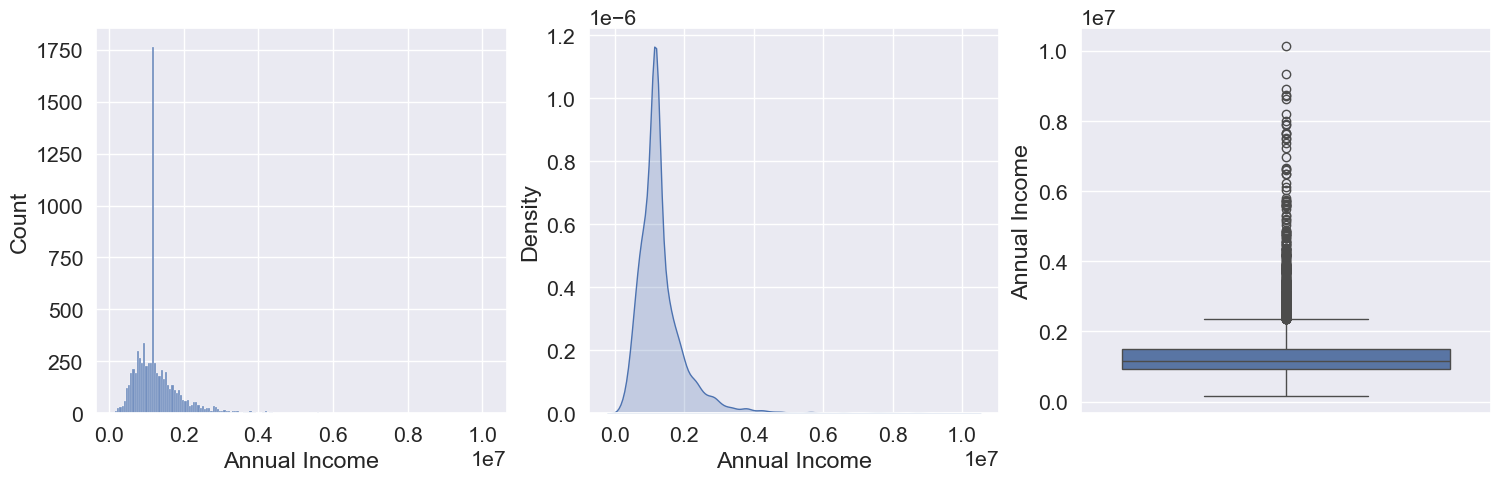

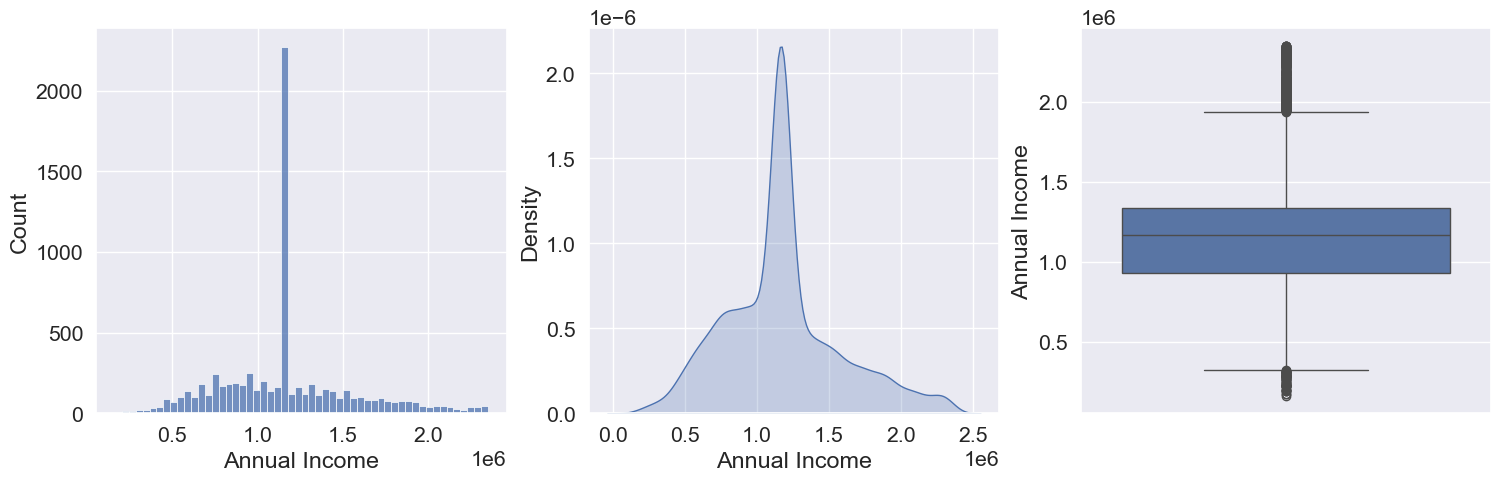

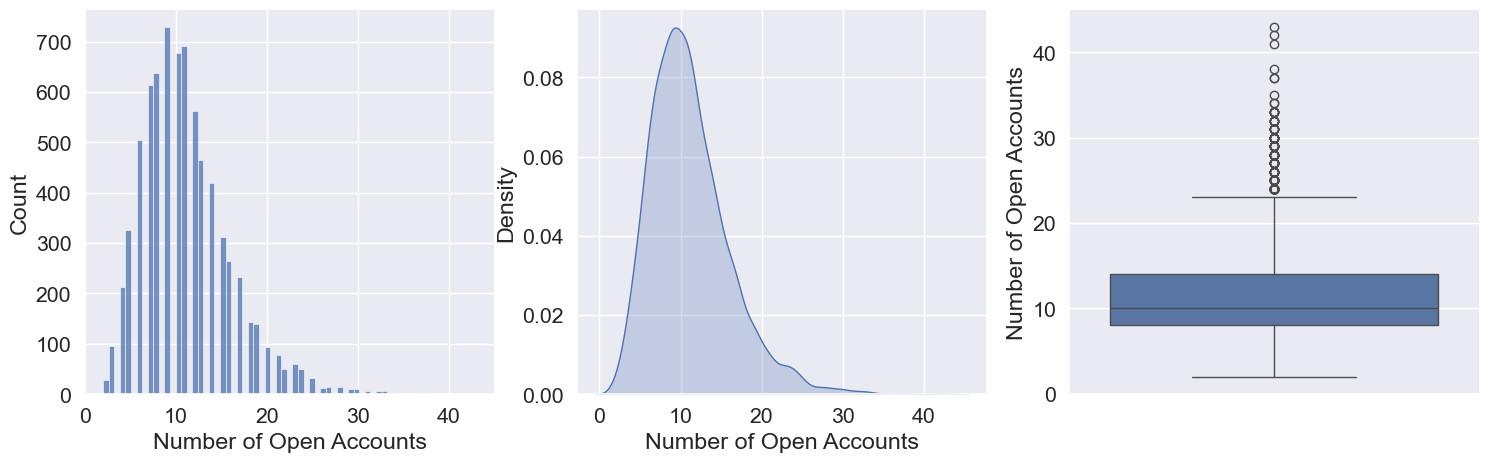

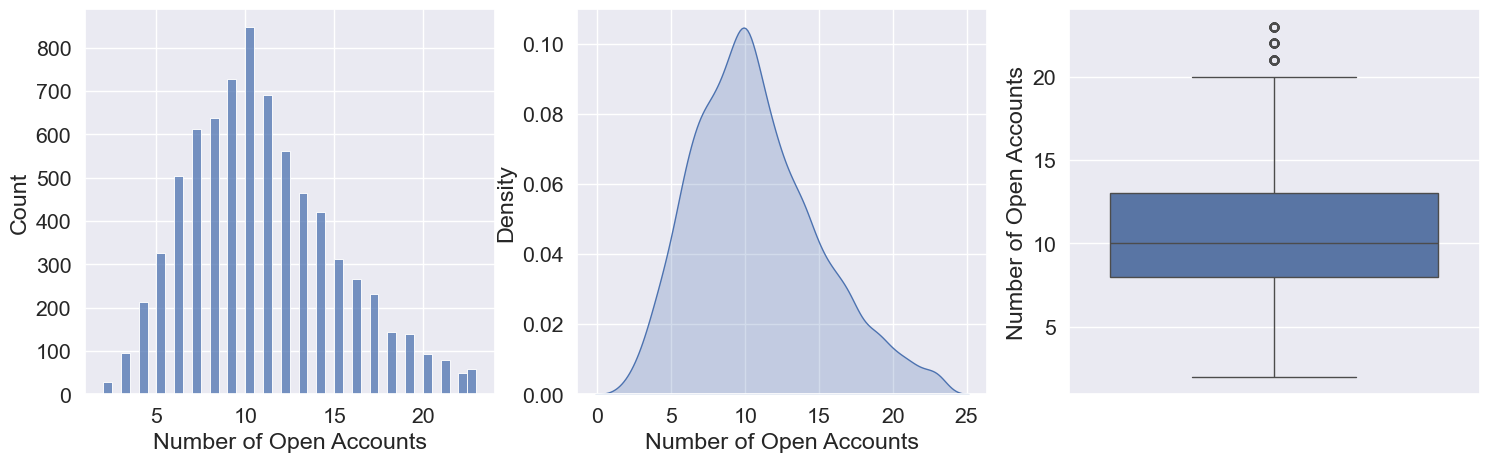

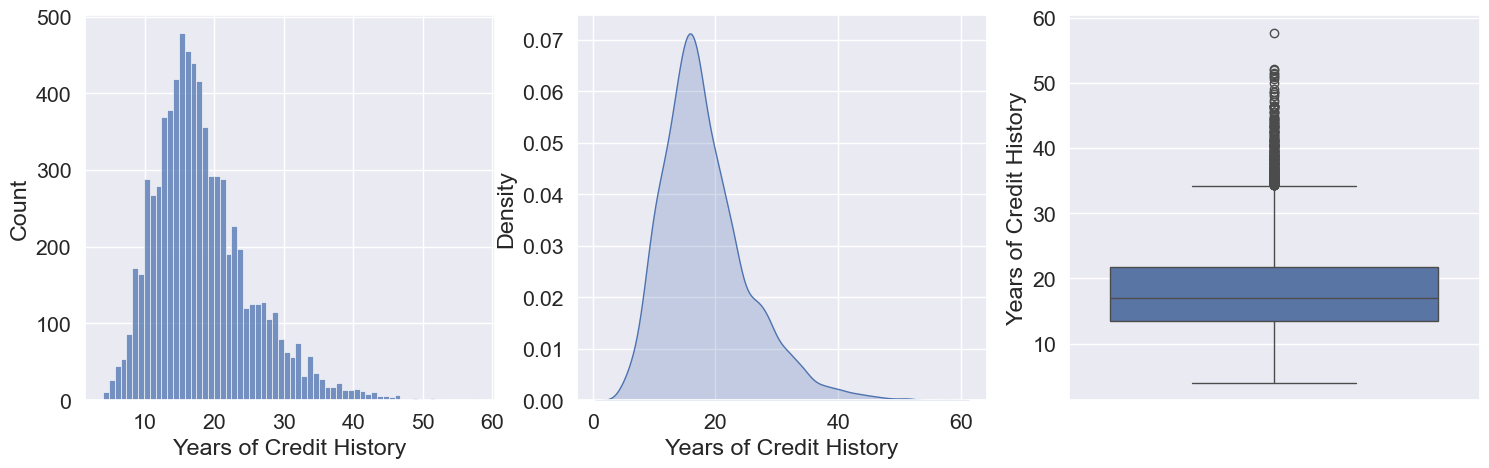

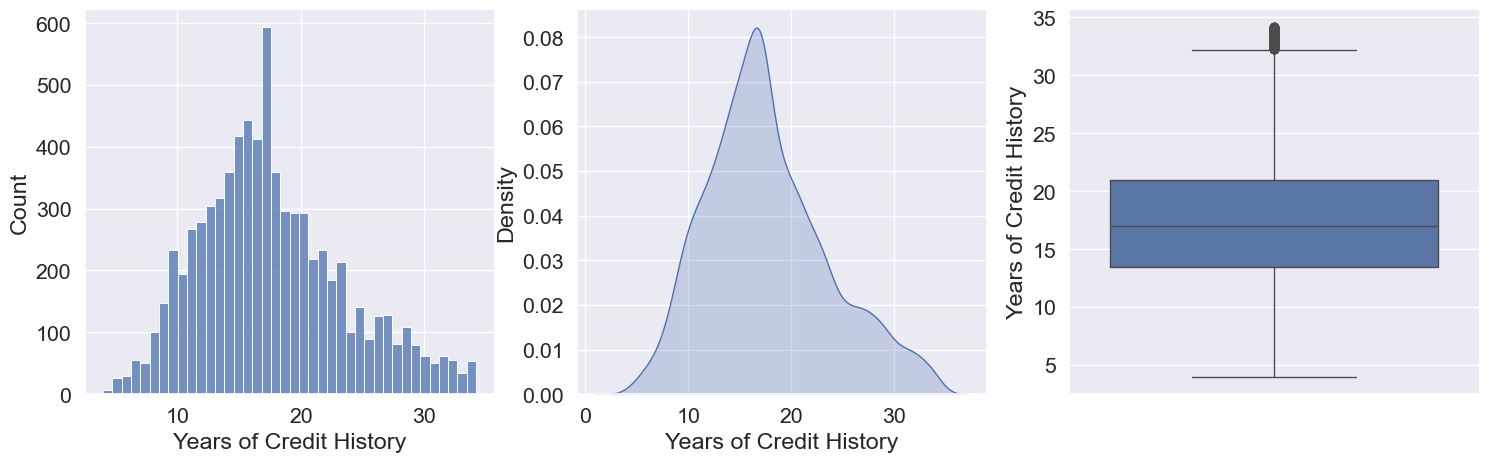

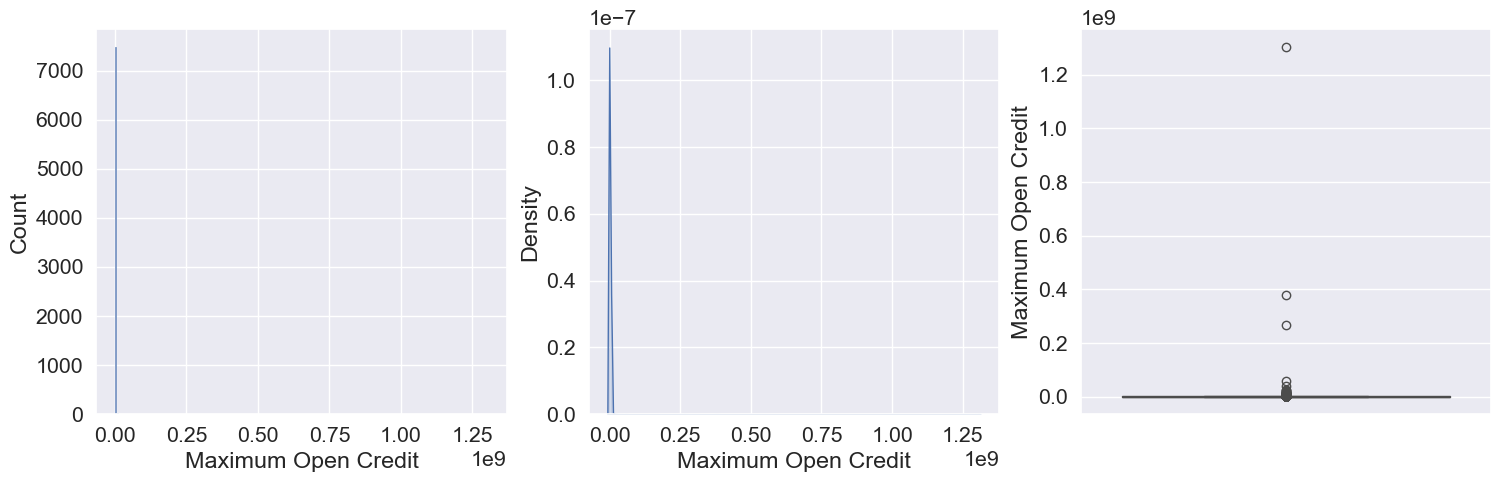

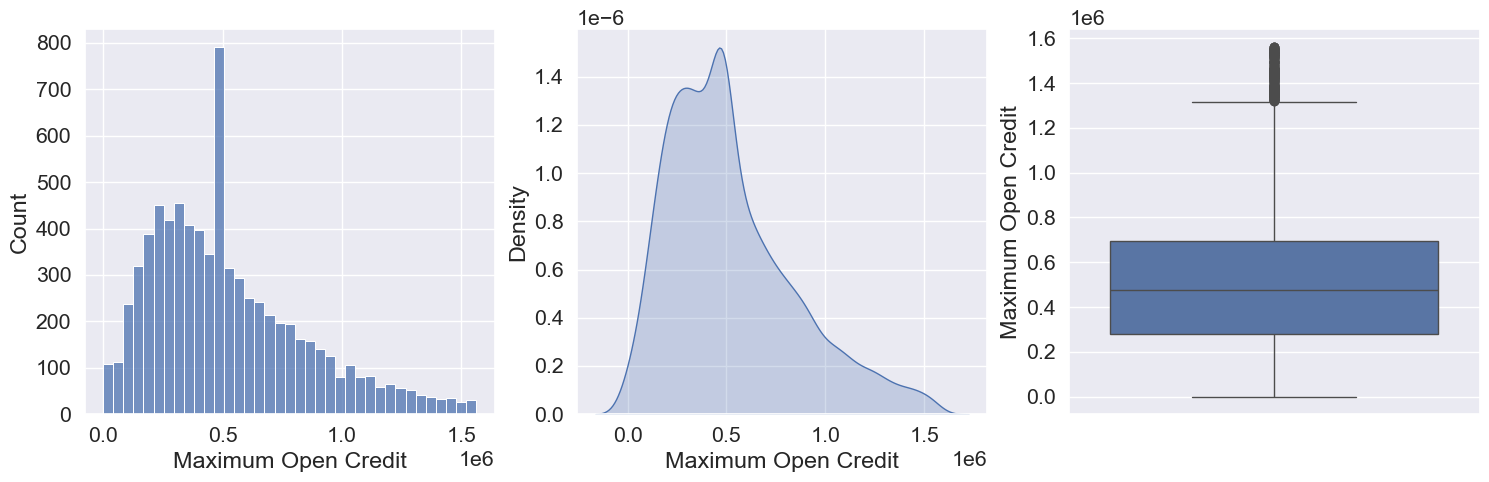

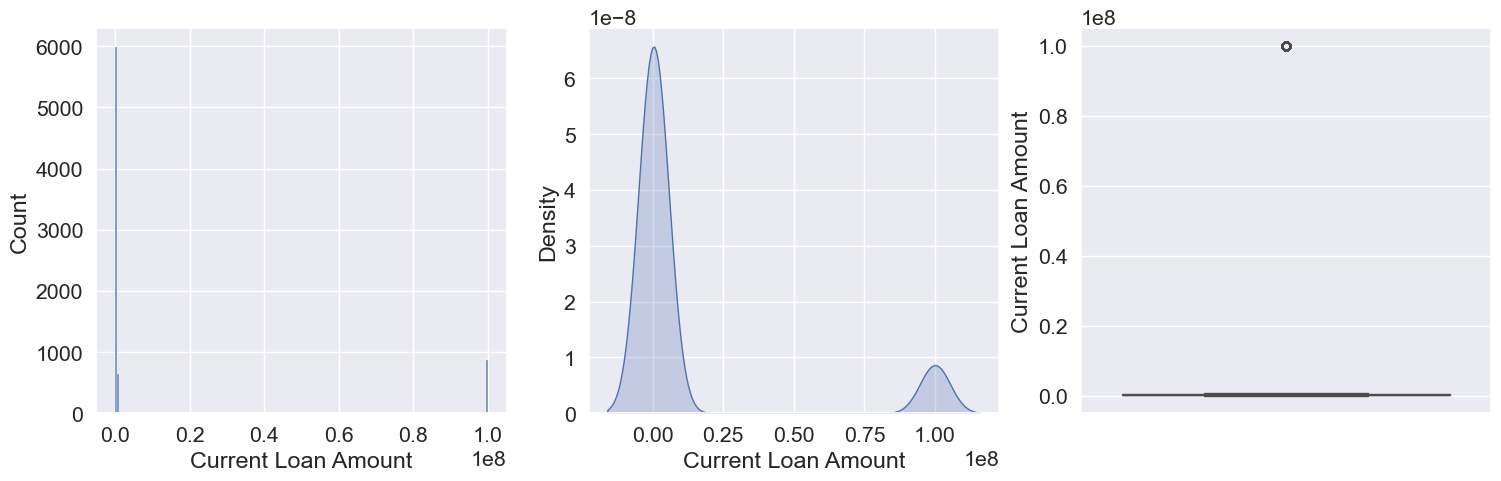

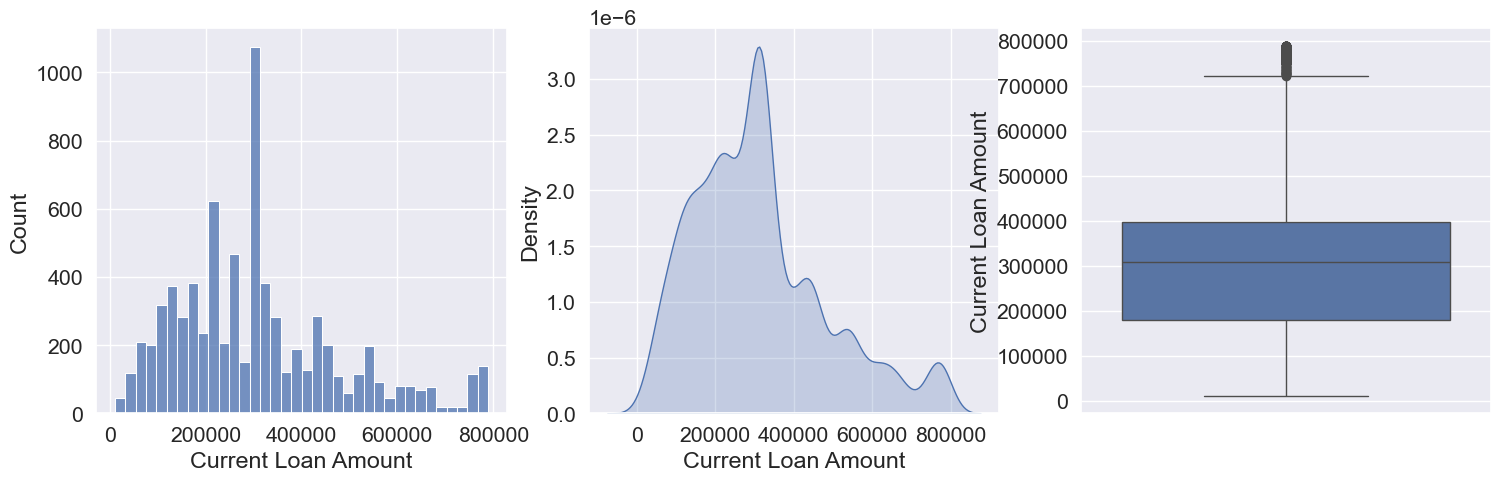

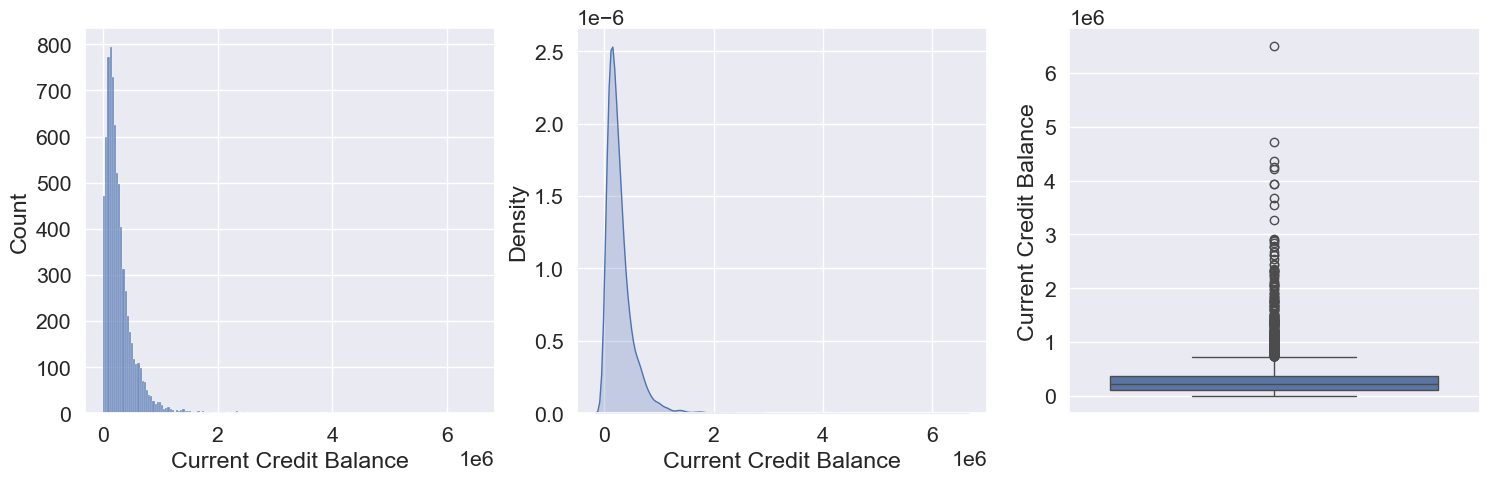

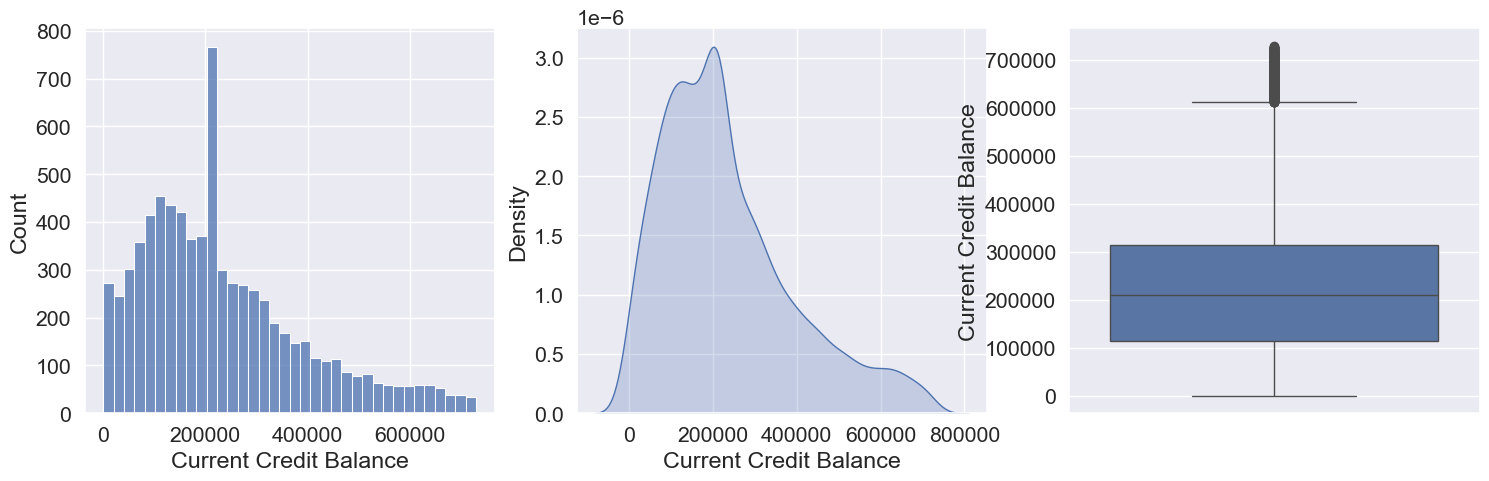

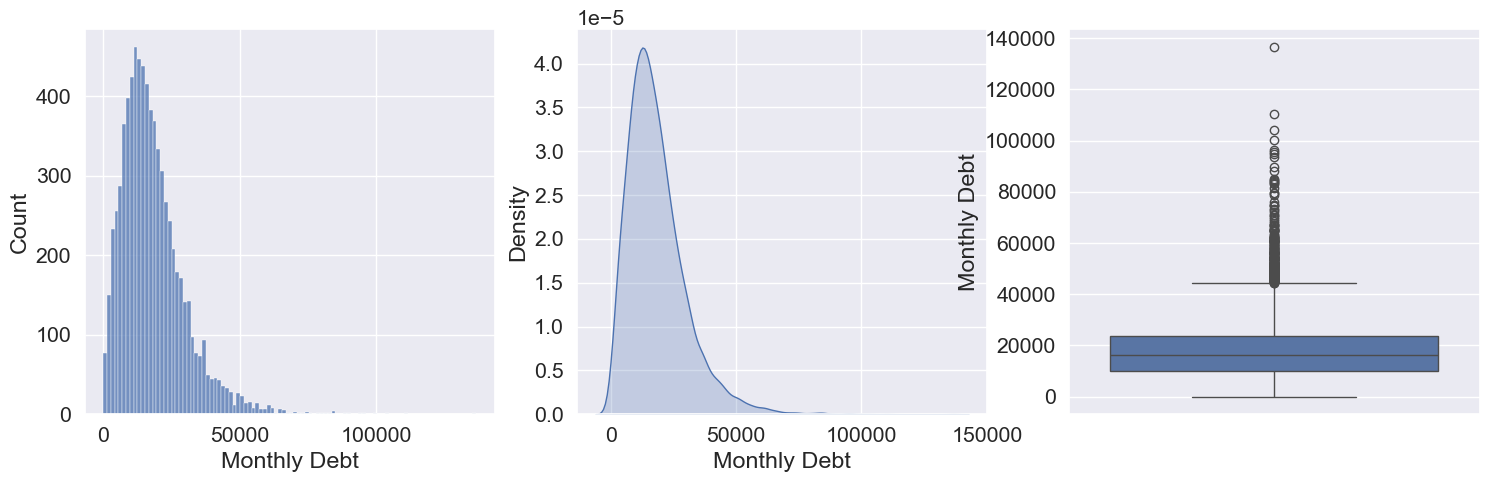

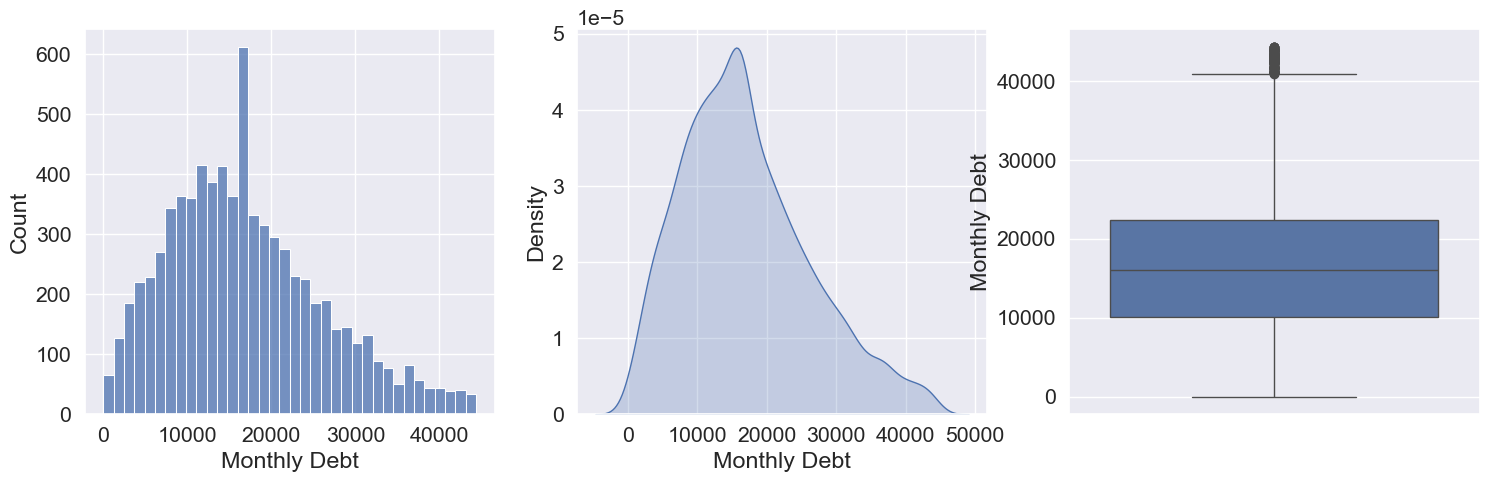

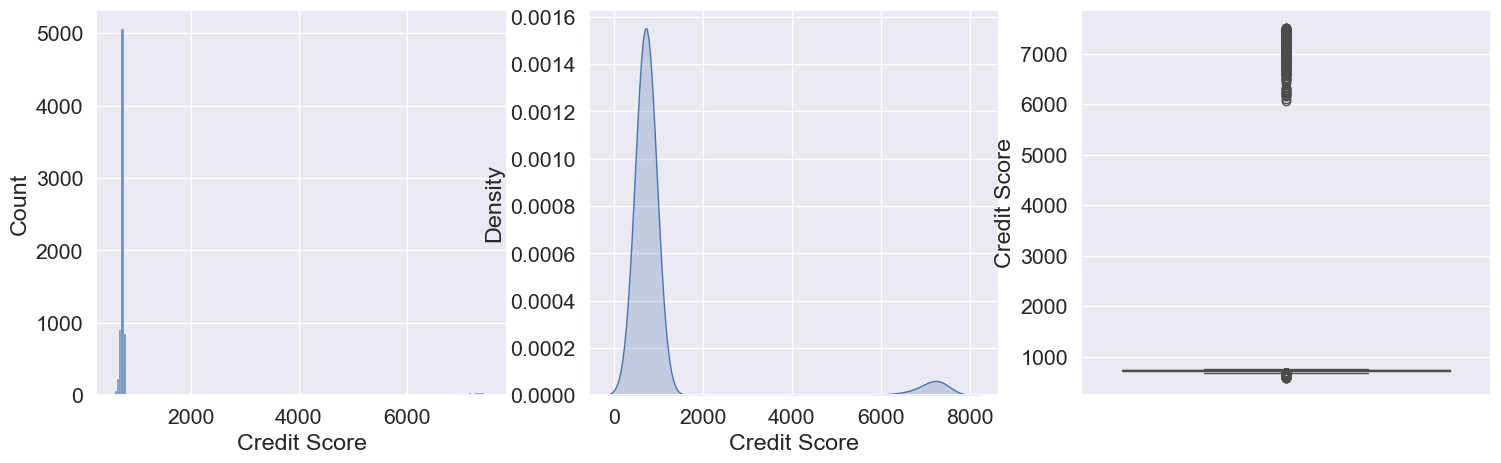

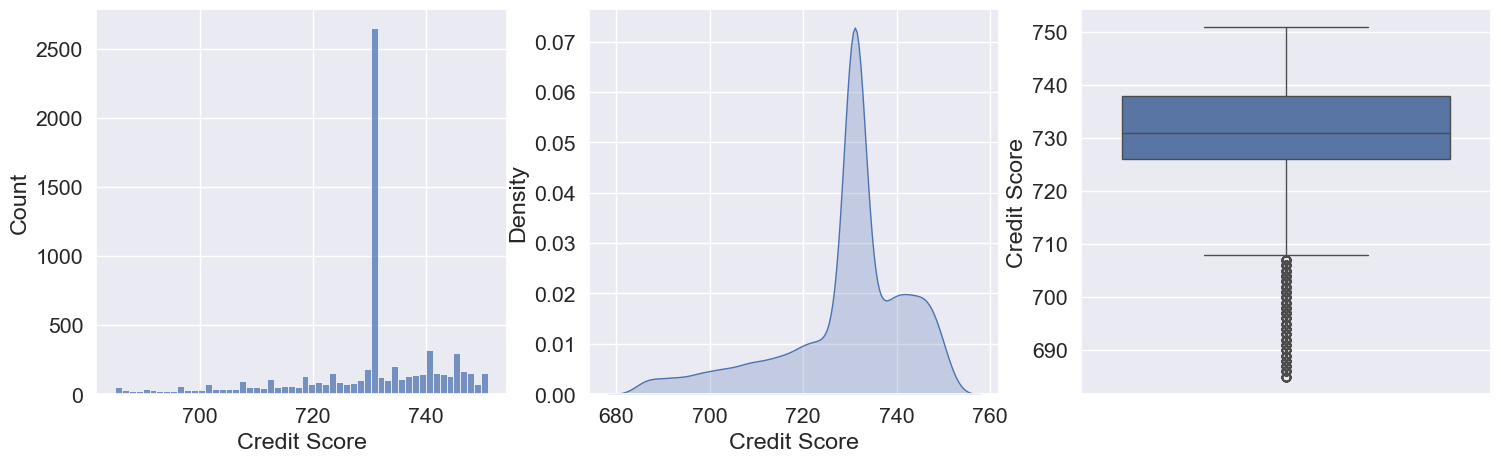

In [30]:
for column in train_data.columns:
    if train_data[column].dtype == np.dtypes.ObjectDType:
        continue
    if column in ["Tax Liens", "Credit Default", "Bankruptcies", "Number of Credit Problems", "Months since last delinquent"]:
        continue
    remove_outliers(column)

In [31]:
train_data = pd.get_dummies(train_data, dtype=int)
train_data.head()

Annual Income  Tax Liens  Number of Open Accounts  Years of Credit History  \
0       482087.0        0.0                     11.0                     26.3   
1      1025487.0        0.0                     15.0                     15.3   
2       751412.0        0.0                     11.0                     17.0   
3       805068.0        0.0                      8.0                     22.5   
4       776264.0        0.0                     13.0                     13.6   

   Maximum Open Credit  Number of Credit Problems  \
0             685960.0                        1.0   
1            1181730.0                        0.0   
2            1182434.0                        0.0   
3             147400.0                        1.0   
4             385836.0                        1.0   

   Months since last delinquent  Bankruptcies  Current Loan Amount  \
0                          32.0           1.0             309573.0   
1                          32.0           0.0             264968.0   
2                          32.0           0.0             309573.0   
3                          32.0           1.0             121396.0   
4                          32.0           0.0             125840.0   

   Current Credit Balance  ...  Purpose_medical bills  Purpose_moving  \
0                 47386.0  ...                      0               0   
1                394972.0  ...                      0               0   
2                308389.0  ...                      0               0   
3                 95855.0  ...                      0               0   
4                 93309.0  ...                      0               0   

   Purpose_other  Purpose_renewable energy  Purpose_small business  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       0   
3              0                         0                       0   
4              0                         0                       0   

   Purpose_take a trip  Purpose_vacation  Purpose_wedding  Term_Long Term  \
0                    0                 0                0               0   
1                    0                 0                0               1   
2                    0                 0                0               0   
3                    0                 0                0               0   
4                    0                 0                0               0   

   Term_Short Term  
0                1  
1                0  
2                1  
3                1  
4                1  

[5 rows x 45 columns]

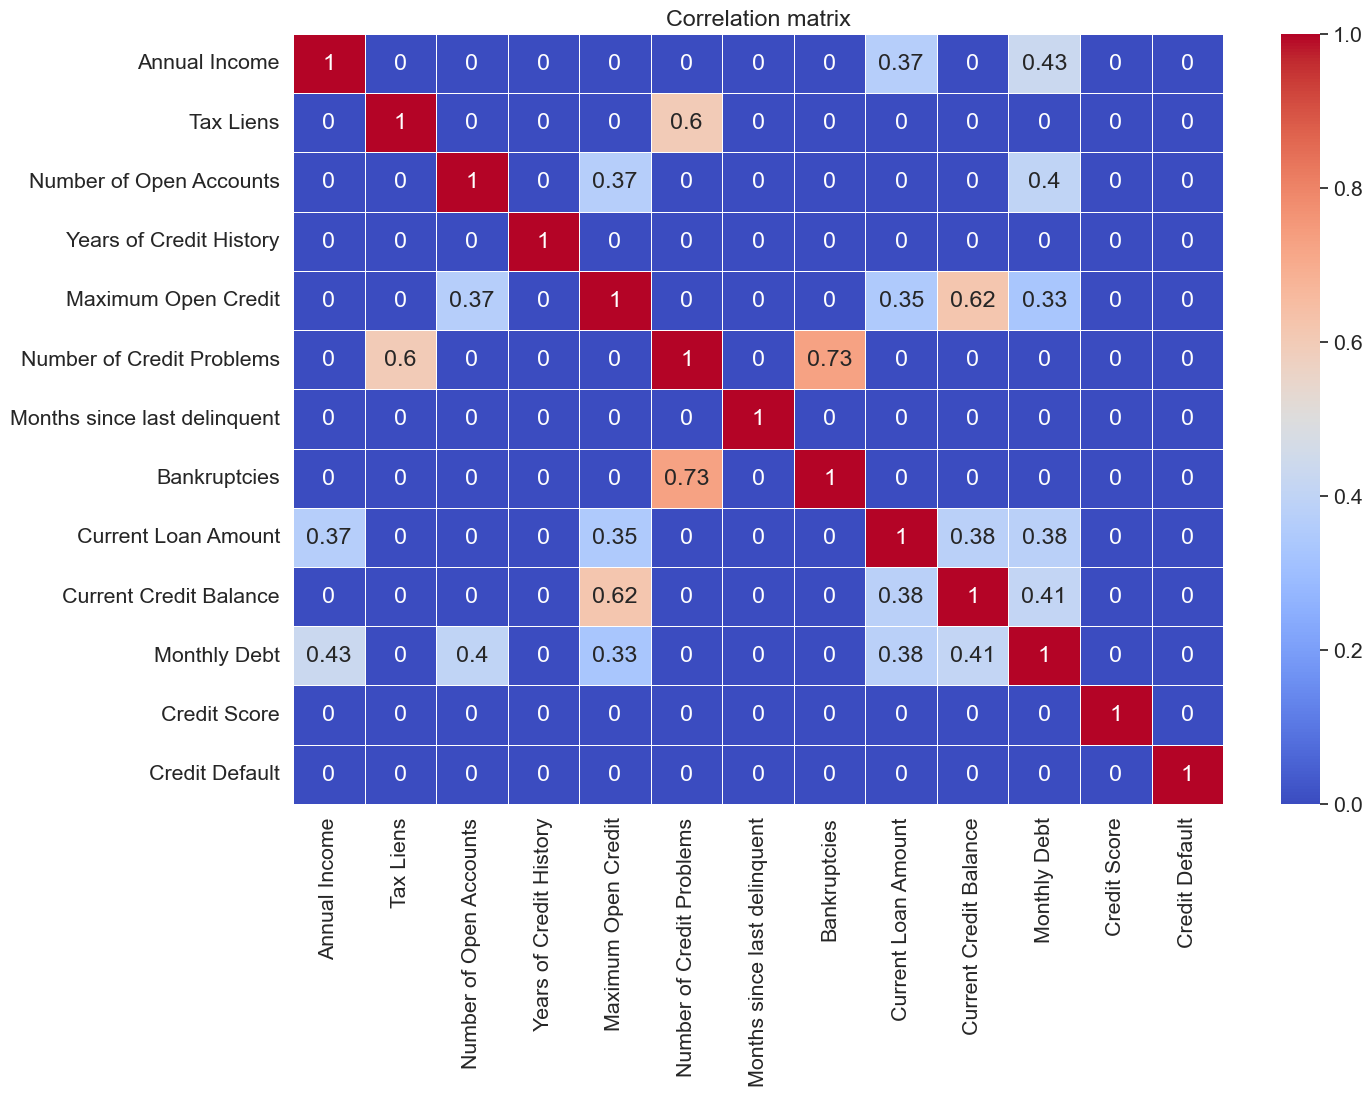

In [32]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_data[train_data.columns[:13]].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, square=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[train_data.columns[:12]])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_data.columns[:12])

answer = pd.concat([X_train_scaled, train_data[train_data.columns[12:]]], axis=1)

In [34]:
answer

Annual Income  Tax Liens  Number of Open Accounts  \
0         -1.732745  -0.110953                 0.061171   
1         -0.372872  -0.110953                 1.008578   
2         -1.058752  -0.110953                 0.061171   
3         -0.924477  -0.110953                -0.649385   
4         -0.996559  -0.110953                 0.534875   
...             ...        ...                      ...   
7495      -1.932684  -0.110953                -1.833644   
7496       0.899655  -0.110953                -0.175681   
7497       1.762841  -0.110953                 0.298023   
7498      -0.015264  -0.110953                 2.429689   
7499      -0.015264  -0.110953                -0.649385   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
0                    1.462346             0.513238                   1.664779   
1                   -0.394571             2.051622                  -0.340979   
2                   -0.107593             2.053806                  -0.340979   
3                    0.820865            -1.157924                   1.664779   
4                   -0.681549            -0.418053                   1.664779   
...                       ...                  ...                        ...   
7495                -1.542484            -1.280599                  -0.340979   
7496                 1.496108             0.514330                  -0.340979   
7497                 2.441447            -0.131573                  -0.340979   
7498                 1.496108             1.926012                  -0.340979   
7499                -1.390554            -0.123278                  -0.340979   

      Months since last delinquent  Bankruptcies  Current Loan Amount  \
0                        -0.083484      2.545732             0.002830   
1                        -0.083484     -0.337099            -0.257436   
2                        -0.083484     -0.337099             0.002830   
3                        -0.083484      2.545732            -1.095166   
4                        -0.083484     -0.337099            -1.069235   
...                            ...           ...                  ...   
7495                     -0.083484     -0.337099            -1.048696   
7496                      0.664664     -0.337099             0.787479   
7497                     -0.083484     -0.337099             0.002830   
7498                     -0.083484     -0.337099             1.786567   
7499                     -0.083484     -0.337099            -1.646378   

      Current Credit Balance  ...  Purpose_medical bills  Purpose_moving  \
0                  -1.159368  ...                      0               0   
1                   1.014346  ...                      0               0   
2                   0.472878  ...                      0               0   
3                  -0.856255  ...                      0               0   
4                  -0.872177  ...                      0               0   
...                      ...  ...                    ...             ...   
7495               -0.996107  ...                      0               0   
7496                1.398495  ...                      0               0   
7497                1.532406  ...                      0               0   
7498                1.521475  ...                      0               0   
7499                0.346571  ...                      0               0   

      Purpose_other  Purpose_renewable energy  Purpose_small business  \
0                 0                         0                       0   
1                 0                         0                       0   
2                 0                         0                       0   
3                 0                         0                       0   
4                 0                         0                       0   
...             ...                       ...                     ...   
7495              1    

In [35]:
answer.to_csv(path + "prepared_train.csv", index=False)

# Лабораторная работа № 2
# Построение регрессионных моделей машинного обученияи

Берем предобработанный набор данных из первой работы, делим на тестовую и тренировочную выборки, после чего запускаем на нем модели.

In [96]:
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [98]:
# регрессионные модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [99]:
# метрики
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [100]:
train_data = pd.read_csv("data/reg/prepared_train.csv")

In [101]:
train_data.head()

Id  DistrictId      Square  LifeSquare  KitchenSquare  Floor  \
0  11809        27.0  102.089242   32.781260           10.0      4   
1   3013        22.0   39.832524   23.169223            8.0      7   
2   8215         1.0   78.342215   47.671972           10.0      2   
3   2352         1.0   40.409907   32.781260            1.0     10   
4  13866        94.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
0        10.0     2014.0   0.075424        11    3097.0       0.0   
1         8.0     1966.0   0.118537        30    6207.0       1.0   
2        17.0     1988.0   0.025609        33    5261.0       0.0   
3        22.0     1977.0   0.007122         1     264.0       0.0   
4        16.0     1972.0   0.282798        33    8667.0       2.0   

   Healthcare_1  Helthcare_2  Shops_1          Price  Ecology_2_A  \
0         900.0            0      0.0  305018.871089            0   
1        1183.0            1      0.0  177734.553407            0   
2         590.0            3      1.0  282078.720850            0   
3         900.0            0      1.0  168106.007630            0   
4         900.0            0      6.0  343995.102962            0   

   Ecology_3_A  Shops_2_A  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0

In [102]:
y = pd.DataFrame(train_data, columns=["Price"])

In [103]:
X = train_data.drop("Price", axis=1)

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Линейная регрессия

In [105]:
lr = LinearRegression()

In [106]:
lr.fit(x_train, y_train)

LinearRegression()

In [107]:
y_pred = lr.predict(x_test)

In [108]:
check_test = pd.DataFrame(
    {
        "y_test": y_test["Price"],
        "y_pred": y_pred.flatten(),
    }
)
check_test.reset_index(drop=True, inplace=True)

In [109]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]
check_test.head()

y_test         y_pred          error
0  225202.099645  347684.610993  122482.511348
1  361744.269547  285370.675572  -76373.593975
2  275055.182201  257883.579404  -17171.602797
3  198133.702204  198188.361073      54.658868
4  221299.460377  164649.435362  -56650.025015

In [110]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""

    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )

    plt.figure(figsize=(8,8))

    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values

    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    # if save == True:
    #     plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

R2:	0.599
RMSE:	51364.145
MSE:	2638275415.6


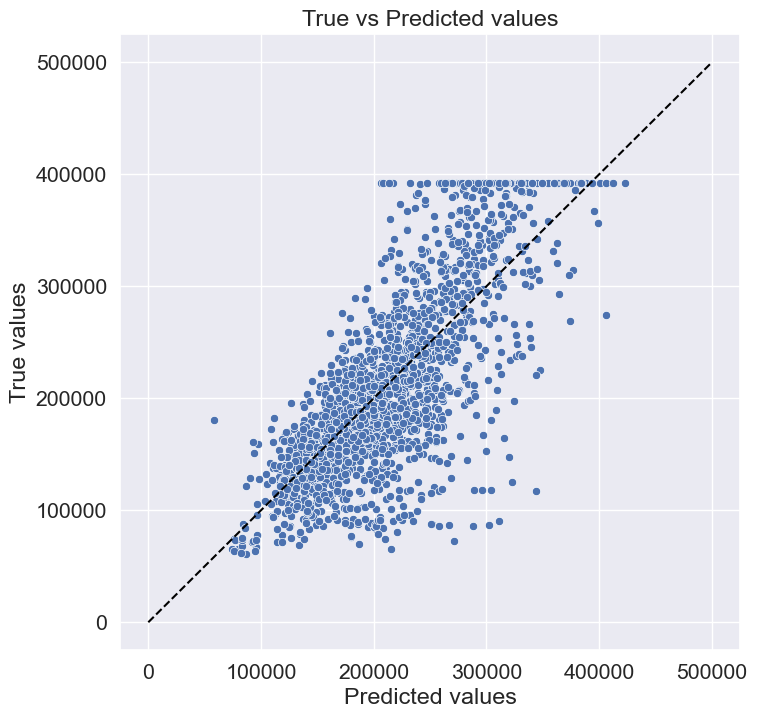

In [111]:
evaluate_preds(check_test["y_test"], check_test["y_pred"])

## Дерево решений

R2:	0.731
RMSE:	41771.851
MSE:	1744887503.418


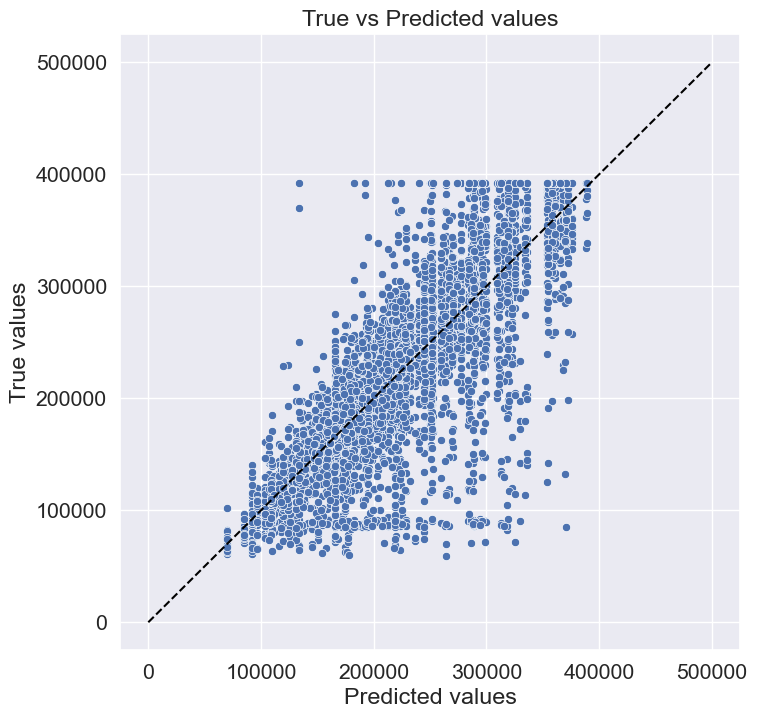

In [112]:
dt_model = DecisionTreeRegressor(criterion='squared_error',
                                 max_depth=30, # глубина дерева
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(x_train, y_train)

y_train_preds = dt_model.predict(x_train)
evaluate_preds(y_train["Price"], y_train_preds)

R2:	0.672
RMSE:	46466.061
MSE:	2159094849.373


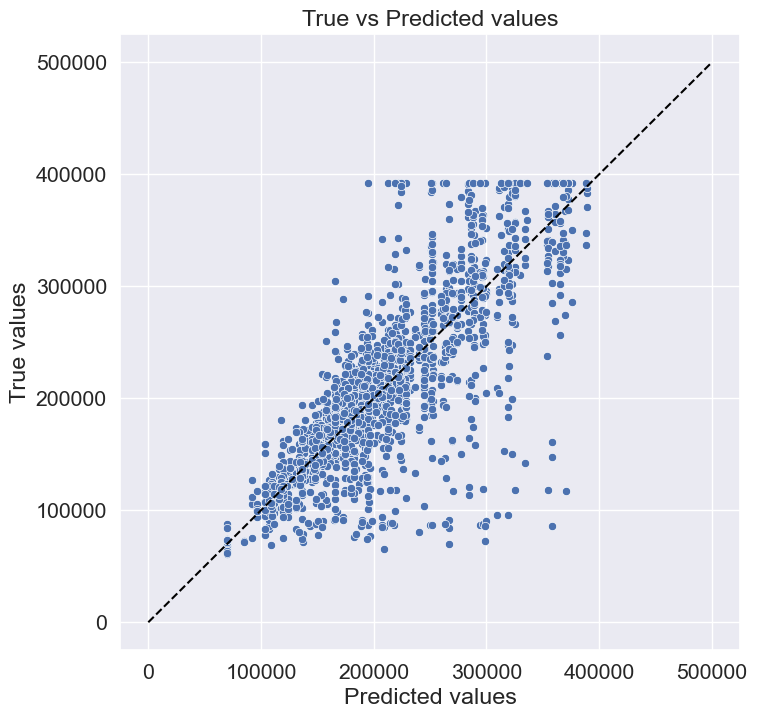

In [113]:
y_test_preds = dt_model.predict(x_test)
evaluate_preds(y_test["Price"], y_test_preds)

## Случайный Forest(Гамп)

R2:	0.741
RMSE:	40955.547
MSE:	1677356803.589


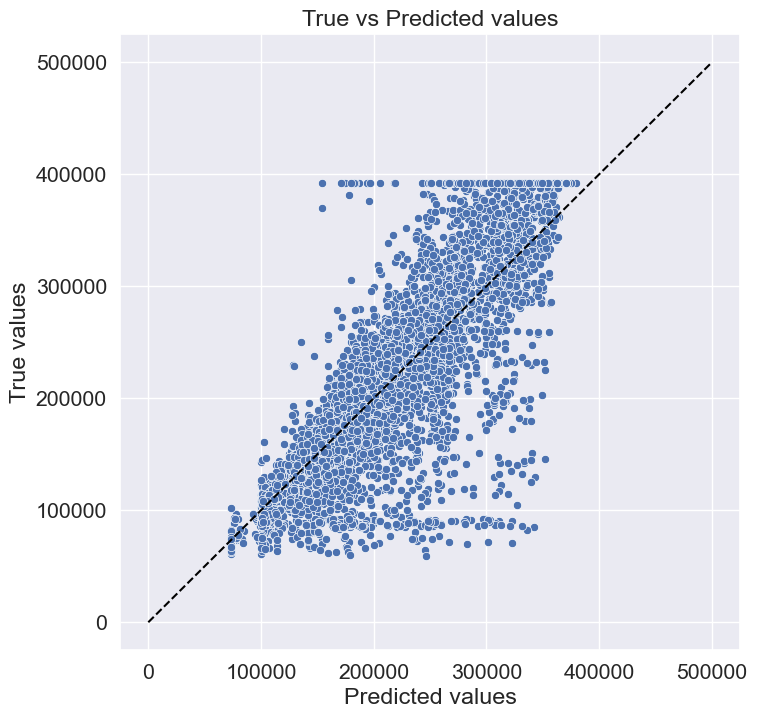

In [114]:
rf_model = RandomForestRegressor(criterion='squared_error',
                                 max_depth=20, # глубина дерева
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(x_train, y_train)
y_train_preds = rf_model.predict(x_train)
evaluate_preds(y_train["Price"], y_train_preds)

R2:	0.718
RMSE:	43026.785
MSE:	1851304214.312


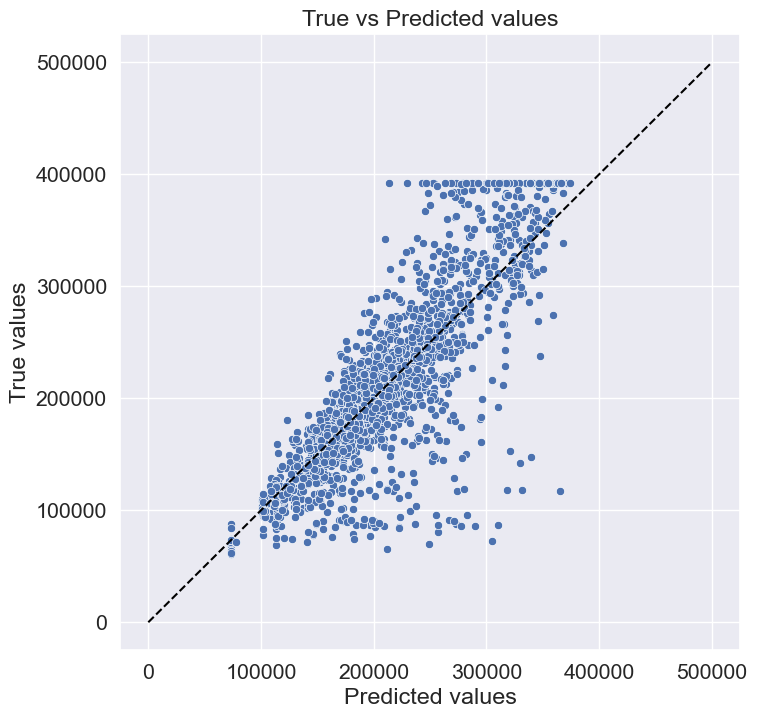

In [115]:
y_test_preds = rf_model.predict(x_test)
evaluate_preds(y_test["Price"], y_test_preds)

## Гарадиент БуБустинг

R2:	0.931
RMSE:	21183.197
MSE:	448727839.04


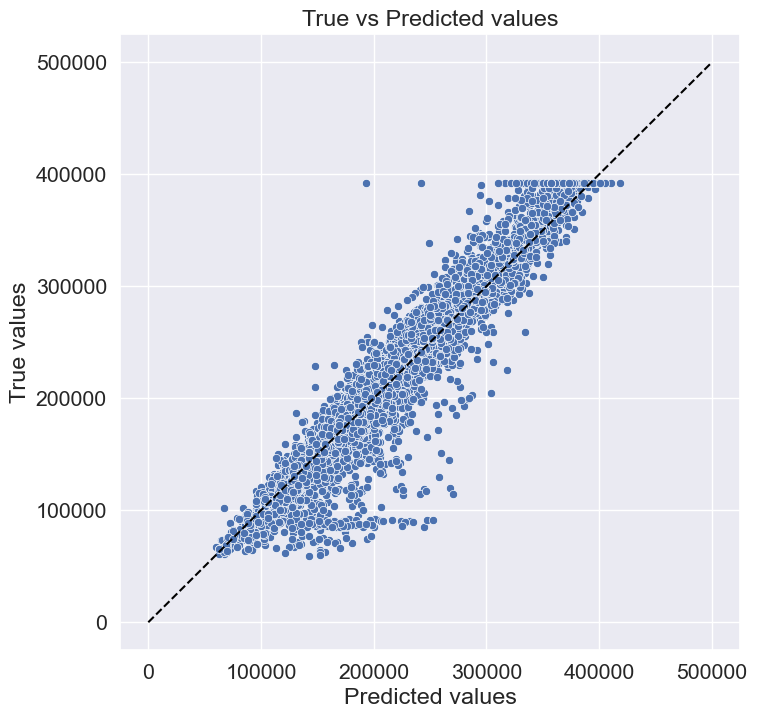

In [116]:
gb_model = GradientBoostingRegressor(criterion='squared_error',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,
                                     n_estimators=200)
gb_model.fit(x_train, y_train)

y_train_preds = gb_model.predict(x_train)
evaluate_preds(y_train["Price"], y_train_preds)

R2:	0.746
RMSE:	40830.352
MSE:	1667117663.317


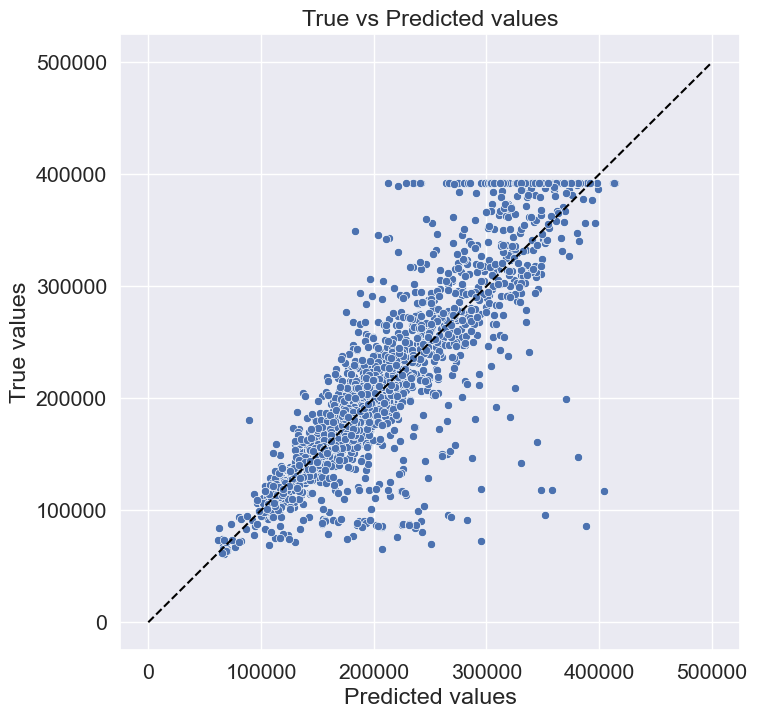

In [117]:
y_test_preds = gb_model.predict(x_test)
evaluate_preds(y_test["Price"], y_test_preds)

## Кросс валидация

In [118]:
from sklearn.metrics import get_scorer_names

In [119]:
x = get_scorer_names()

In [120]:
%%time
params = {'n_estimators': [50, 100, 200, 400],
          'max_depth': [3, 5, 7, 10]}

gs = GridSearchCV(gb_model, params,
                  scoring= 'r2', # метрика
                  cv=KFold(n_splits=10,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=21,
                           shuffle=True),
                  n_jobs=-1
                  )
gs.fit(x_train, y_train)

CPU times: total: 3.59 s
Wall time: 33.1 s


GridSearchCV(cv=KFold(n_splits=10, random_state=21, shuffle=True),
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 max_depth=7,
                                                 min_samples_leaf=10,
                                                 n_estimators=200,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [121]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [122]:
gs.best_score_

np.float64(0.7445207911742833)

R2:	0.864
RMSE:	29709.322
MSE:	882643800.328


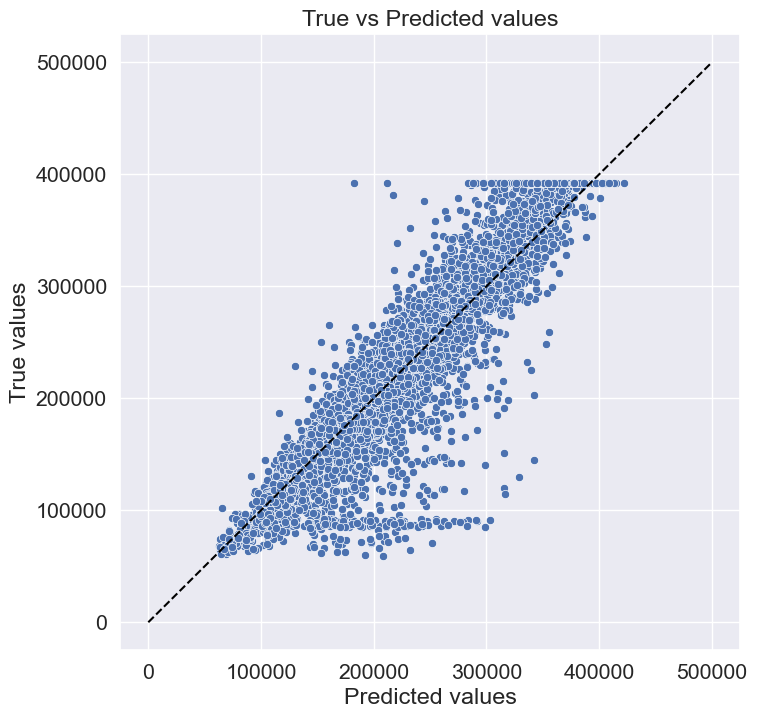

In [123]:
final_model = GradientBoostingRegressor(criterion='squared_error',
                                        max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=42,
                                        n_estimators=200)

final_model.fit(x_train, y_train)

y_train_preds = final_model.predict(x_train)
evaluate_preds(y_train["Price"], y_train_preds)

R2:	0.754
RMSE:	40219.663
MSE:	1617621263.54


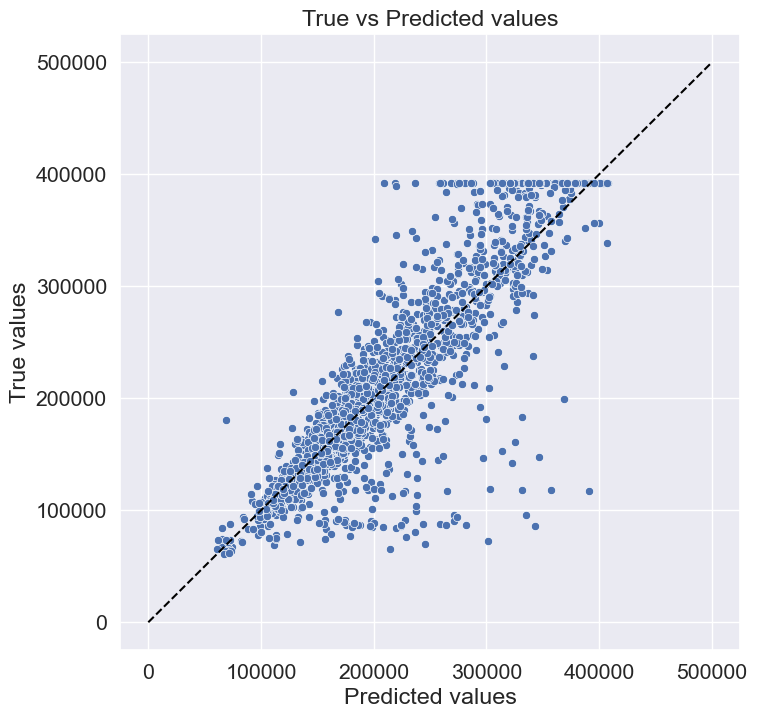

In [124]:
y_test_preds = final_model.predict(x_test)
evaluate_preds(y_test["Price"], y_test_preds, save=True)

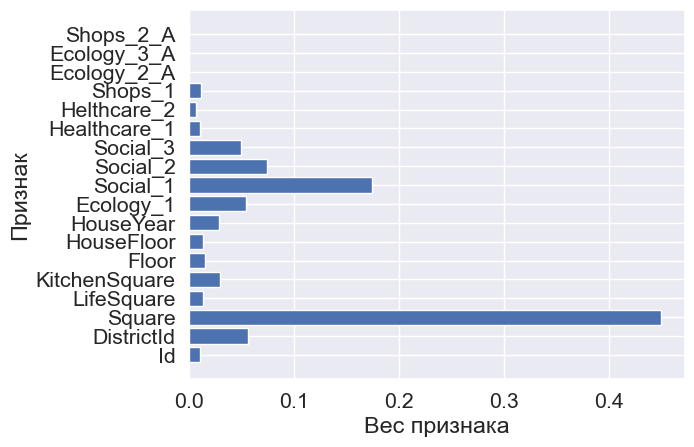

[1.04966030e-02 5.62724920e-02 4.49540597e-01 1.30929648e-02
 2.92988408e-02 1.50875397e-02 1.39749286e-02 2.87066846e-02
 5.46406359e-02 1.74570811e-01 7.47644695e-02 4.96413817e-02
 1.09028920e-02 7.01745733e-03 1.13103835e-02 5.83106598e-05
 1.03577635e-04 5.19430779e-04]


(18,)

In [125]:
plt.barh(X.columns, final_model.feature_importances_)

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()
print(final_model.feature_importances_)
X.columns.shape

В итоге делаю заключение о том, что Кросс-валидированная модель GB лучше всего справляется с задачей, по причине того, что это самый сильный алгоритм из нами изученных и сочетает в себе все предыдущие алгоритмы. НА конечном графике можем заметить, что параметр shops2 и ecology2 & 3 вклада не несут и в общем и целом их также можно дропнуть, как и высоко коррелированные признаки, тем самым значительно упростив модель и не сильно потеряв в метрике.

# Обучу модель на всей тренировочной выборке и сохраню данные

R2:	0.854
RMSE:	30754.164
MSE:	945818601.432


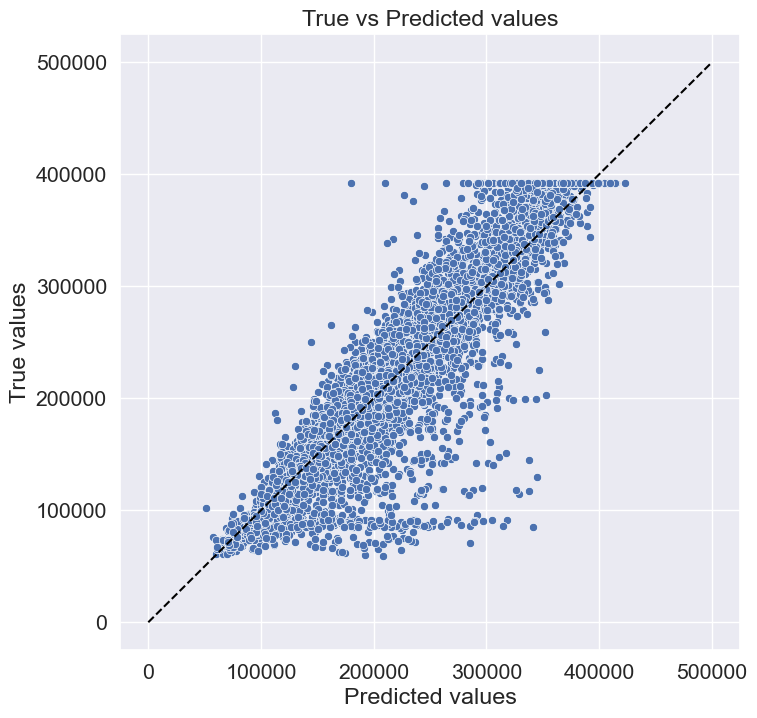

In [126]:
final_model = GradientBoostingRegressor(criterion='squared_error',
                                        max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=42,
                                        n_estimators=200)

final_model.fit(X, y)

y_train_preds = final_model.predict(X)
evaluate_preds(y["Price"], y_train_preds)

In [134]:
with open("models/model.pkl", 'wb') as file:
    pickle.dump(final_model, file)

In [135]:
with open("models/model.pkl", 'rb') as file:
    my_model = pickle.load(file)

my_model

GradientBoostingRegressor(criterion='squared_error', max_depth=5,
                          min_samples_leaf=10, n_estimators=200,
                          random_state=42)

Запускаем на тесте и сохраняем значения

In [165]:
test_data = pd.read_csv("data/reg/prepared_test.csv")


In [166]:
test_data.head()

Id  DistrictId     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0  4567          44  36.847630   19.094182            5.0      5         9.0   
1  5925          62  42.493907   42.568133           10.0      7        17.0   
2   960          27  59.463678   32.925087            9.0     19        19.0   
3  3848          23  49.646030   33.893825            6.0      2         2.0   
4   746          74  53.837056   32.925087            1.0      8        17.0   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0     1970.0   0.036122        24    4378.0       0.0        1036.0   
1     2017.0   0.072158         2     629.0       1.0         900.0   
2     1977.0   0.211401         9    1892.0       0.0         900.0   
3     1965.0   0.014073         2     475.0       0.0         900.0   
4     1977.0   0.309479        35    7715.0       4.0         990.0   

   Helthcare_2  Shops_1  Ecology_2_A  Ecology_3_A  Shops_2_A  
0            1      1.0            0            0          0  
1            0      0.0            0            0          1  
2            0      1.0            0            0          0  
3            0      0.0            0            0          0  
4            0      6.0            0            0          0

In [167]:
y_test_preds = final_model.predict(test_data)

In [169]:
y_test_preds

array([164550.40499099, 120960.72592892, 148568.78073139, ...,
       149514.40309034, 194704.76762725, 277454.80202159], shape=(5000,))

In [170]:
test_data["Price"] = y_test_preds

In [173]:
out = test_data[["Id", "Price"]]
out.head()

Id          Price
0  4567  164550.404991
1  5925  120960.725929
2   960  148568.780731
3  3848  110775.745148
4   746  199641.618064

In [174]:
out.to_csv(path + "predict.csv", index=False)